In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

In [3]:
!pip install xgboost

import xgboost
from xgboost import XGBRegressor, XGBClassifier

You should consider upgrading via the '/home/andres/anaconda3/bin/python -m pip install --upgrade pip' command.


## DATA

In [4]:
# data

folder_data = "../../MLL-exclusion/data/"

In [5]:
folder_saved = "Zprime-SSM-ee-mZ7500GeV-variables/"

# 1st DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-7500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-7500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-7500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-7500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-7500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-7500-1.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-1.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()




# 2nd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-7500-2.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-7500-2.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-7500-2.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-7500-2.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-7500-2.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-7500-2.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-2.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()





# 3rd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-7500-3.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-7500-3.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-7500-3.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-7500-3.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-7500-3.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-7500-3.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-3.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()

423037
203200
770095


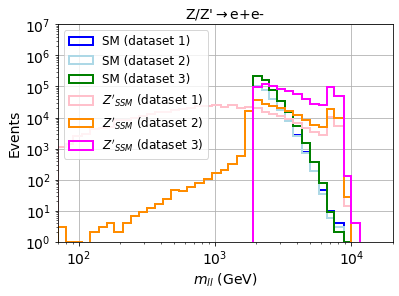

In [6]:
# just to check that we need to ask again that the invariant mass has to be greater than 2000 GeV

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

folder_saved = "SM/ee/"

invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mee.txt", delimiter=',')
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800.txt", delimiter=',')
invariant_mass_eeSM_1800_2 = np.loadtxt(folder_data + folder_saved +"mee-1800-2.txt", delimiter=',')

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM (dataset 1)")
plt.hist(invariant_mass_eeSM_1800, bins=bins_atlas, lw=2, edgecolor='lightblue', histtype='step', label="SM (dataset 2)")
plt.hist(invariant_mass_eeSM_1800_2, bins=bins_atlas, lw=2, edgecolor='green', histtype='step', label="SM (dataset 3)")


folder_saved = "Zprime-SSM-ee-mZ7500GeV-variables/"

invariant_mass_eeSSMZprime_1 = np.loadtxt(folder_data + folder_saved +"mee-1.txt", delimiter=',')
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mee-2.txt", delimiter=',')
invariant_mass_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved +"mee-3.txt", delimiter=',')

plt.hist(invariant_mass_eeSSMZprime_1, bins=bins_atlas, lw=2, edgecolor='pink', histtype='step', label="$Z'_{SSM}$ (dataset 1)")
plt.hist(invariant_mass_eeSSMZprime_2, bins=bins_atlas, lw=2, edgecolor='darkorange', histtype='step', label="$Z'_{SSM}$ (dataset 2)")
plt.hist(invariant_mass_eeSSMZprime_3, bins=bins_atlas, lw=2, edgecolor='magenta', histtype='step', label="$Z'_{SSM}$ (dataset 3)")


plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow$e+e-",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### SM

In [7]:
######
# SM #
######


folder_saved = "SM/ee/"


# 1st DATASET
invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mee.txt", delimiter=',')

e1pt_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-pt.txt', delimiter=',')
e1eta_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-eta.txt', delimiter=',')
e1phi_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-phi.txt', delimiter=',')

e2pt_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-pt.txt', delimiter=',')
e2eta_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-eta.txt', delimiter=',')
e2phi_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-phi.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM))):
    if invariant_mass_eeSM[i]< 2000 or e1eta_eeSM[i] < -2.47 or -1.52 < e1eta_eeSM[i] < -1.37 or 1.37 < e1eta_eeSM[i] < 1.52 or e1eta_eeSM[i] > 2.47 or e2eta_eeSM[i] < -2.47 or -1.52 < e2eta_eeSM[i] < -1.37 or 1.37 < e2eta_eeSM[i] < 1.52 or e2eta_eeSM[i] > 2.47:
        e1pt_eeSM = np.delete(e1pt_eeSM, i)
        e1eta_eeSM = np.delete(e1eta_eeSM, i)
        e1phi_eeSM = np.delete(e1phi_eeSM, i)
        
        e2pt_eeSM = np.delete(e2pt_eeSM, i)
        e2eta_eeSM = np.delete(e2eta_eeSM, i)
        e2phi_eeSM = np.delete(e2phi_eeSM, i)
        
        invariant_mass_eeSM = np.delete(invariant_mass_eeSM, i)
        

        
        
# 2nd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-pt-1800.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-eta-1800.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-phi-1800.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-pt-1800.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-eta-1800.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-phi-1800.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.47 or -1.52 < e1eta_eeSM_1800[i] < -1.37 or 1.37 < e1eta_eeSM_1800[i] < 1.52 or e1eta_eeSM_1800[i] > 2.47 or e2eta_eeSM_1800[i] < -2.47 or -1.52 < e2eta_eeSM_1800[i] < -1.37 or 1.37 < e2eta_eeSM_1800[i] < 1.52 or e2eta_eeSM_1800[i] > 2.47:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800








# 3rd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800-2.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-pt-1800-2.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-eta-1800-2.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-phi-1800-2.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-pt-1800-2.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-eta-1800-2.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-phi-1800-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.47 or -1.52 < e1eta_eeSM_1800[i] < -1.37 or 1.37 < e1eta_eeSM_1800[i] < 1.52 or e1eta_eeSM_1800[i] > 2.47 or e2eta_eeSM_1800[i] < -2.47 or -1.52 < e2eta_eeSM_1800[i] < -1.37 or 1.37 < e2eta_eeSM_1800[i] < 1.52 or e2eta_eeSM_1800[i] > 2.47:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800





# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSM = np.array([a-b for a,b in zip(e1eta_eeSM,e2eta_eeSM)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSM = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSM,e2eta_eeSM,e1phi_eeSM,e2phi_eeSM)])



print(e1pt_eeSM.shape)
print(e1eta_eeSM.shape)
print(e1phi_eeSM.shape)

print(e2pt_eeSM.shape)
print(e2eta_eeSM.shape)
print(e2phi_eeSM.shape)

print(invariant_mass_eeSM.shape)
print(e1e2diffeta_eeSM.shape)
print(e1e2R_eeSM.shape)

(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)


In [8]:
print(min(e1eta_eeSM))
print(max(e1eta_eeSM))

print(min(e2eta_eeSM))
print(max(e2eta_eeSM))

-2.47
2.47
-2.47
2.47


### SSM Z prime

In [9]:
##########
# Zprime #
##########


folder_saved = "Zprime-SSM-ee-mZ7500GeV-variables/"


# 1st DATASET
invariant_mass_eeSSMZprime = np.loadtxt(folder_data + folder_saved +"mee-1.txt", delimiter=',')

e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-7500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-7500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-7500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-7500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-7500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-7500-1.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime))):
    if invariant_mass_eeSSMZprime[i]< 2000 or e1eta_eeSSMZprime[i] < -2.47 or -1.52 < e1eta_eeSSMZprime[i] < -1.37 or 1.37 < e1eta_eeSSMZprime[i] < 1.52 or e1eta_eeSSMZprime[i] > 2.47 or e2eta_eeSSMZprime[i] < -2.47 or -1.52 < e2eta_eeSSMZprime[i] < -1.37 or 1.37 < e2eta_eeSSMZprime[i] < 1.52 or e2eta_eeSSMZprime[i] > 2.47:
        e1pt_eeSSMZprime = np.delete(e1pt_eeSSMZprime, i)
        e1eta_eeSSMZprime = np.delete(e1eta_eeSSMZprime, i)
        e1phi_eeSSMZprime = np.delete(e1phi_eeSSMZprime, i)
        
        e2pt_eeSSMZprime = np.delete(e2pt_eeSSMZprime, i)
        e2eta_eeSSMZprime = np.delete(e2eta_eeSSMZprime, i)
        e2phi_eeSSMZprime = np.delete(e2phi_eeSSMZprime, i)
        
        invariant_mass_eeSSMZprime = np.delete(invariant_mass_eeSSMZprime, i)
        
        
        
        
# 2nd DATASET
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mee-2.txt", delimiter=',')

e1pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-pt-7500-2.txt', delimiter=',')
e1eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-eta-7500-2.txt', delimiter=',')
e1phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-phi-7500-2.txt', delimiter=',')

e2pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-pt-7500-2.txt', delimiter=',')
e2eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-eta-7500-2.txt', delimiter=',')
e2phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-phi-7500-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime_2))):
    if invariant_mass_eeSSMZprime_2[i]< 2000 or e1eta_eeSSMZprime_2[i] < -2.47 or -1.52 < e1eta_eeSSMZprime_2[i] < -1.37 or 1.37 < e1eta_eeSSMZprime_2[i] < 1.52 or e1eta_eeSSMZprime_2[i] > 2.47 or e2eta_eeSSMZprime_2[i] < -2.47 or -1.52 < e2eta_eeSSMZprime_2[i] < -1.37 or 1.37 < e2eta_eeSSMZprime_2[i] < 1.52 or e2eta_eeSSMZprime_2[i] > 2.47:
        e1pt_eeSSMZprime_2 = np.delete(e1pt_eeSSMZprime_2, i)
        e1eta_eeSSMZprime_2 = np.delete(e1eta_eeSSMZprime_2, i)
        e1phi_eeSSMZprime_2 = np.delete(e1phi_eeSSMZprime_2, i)
        
        e2pt_eeSSMZprime_2 = np.delete(e2pt_eeSSMZprime_2, i)
        e2eta_eeSSMZprime_2 = np.delete(e2eta_eeSSMZprime_2, i)
        e2phi_eeSSMZprime_2 = np.delete(e2phi_eeSSMZprime_2, i)
        
        invariant_mass_eeSSMZprime_2 = np.delete(invariant_mass_eeSSMZprime_2, i)
        
eventos_parton = 500000
aceptancia_eeSSMZprime_2 = 1.*len(invariant_mass_eeSSMZprime_2) / eventos_parton
print(aceptancia_eeSSMZprime_2)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_2])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_2])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_2])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_2])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_2])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_2])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_2])



# remove the aux
del e1pt_eeSSMZprime_2
del e1eta_eeSSMZprime_2
del e1phi_eeSSMZprime_2

del e2pt_eeSSMZprime_2
del e2eta_eeSSMZprime_2
del e2phi_eeSSMZprime_2

del invariant_mass_eeSSMZprime_2







        
# 3rd DATASET
invariant_mass_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved +"mee-3.txt", delimiter=',')

e1pt_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-pt-7500-3.txt', delimiter=',')
e1eta_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-eta-7500-3.txt', delimiter=',')
e1phi_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-phi-7500-3.txt', delimiter=',')

e2pt_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-pt-7500-3.txt', delimiter=',')
e2eta_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-eta-7500-3.txt', delimiter=',')
e2phi_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-phi-7500-3.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime_3))):
    if invariant_mass_eeSSMZprime_3[i]< 2000 or e1eta_eeSSMZprime_3[i] < -2.47 or -1.52 < e1eta_eeSSMZprime_3[i] < -1.37 or 1.37 < e1eta_eeSSMZprime_3[i] < 1.52 or e1eta_eeSSMZprime_3[i] > 2.47 or e2eta_eeSSMZprime_3[i] < -2.47 or -1.52 < e2eta_eeSSMZprime_3[i] < -1.37 or 1.37 < e2eta_eeSSMZprime_3[i] < 1.52 or e2eta_eeSSMZprime_3[i] > 2.47:
        e1pt_eeSSMZprime_3 = np.delete(e1pt_eeSSMZprime_3, i)
        e1eta_eeSSMZprime_3 = np.delete(e1eta_eeSSMZprime_3, i)
        e1phi_eeSSMZprime_3 = np.delete(e1phi_eeSSMZprime_3, i)
        
        e2pt_eeSSMZprime_3 = np.delete(e2pt_eeSSMZprime_3, i)
        e2eta_eeSSMZprime_3 = np.delete(e2eta_eeSSMZprime_3, i)
        e2phi_eeSSMZprime_3 = np.delete(e2phi_eeSSMZprime_3, i)
        
        invariant_mass_eeSSMZprime_3 = np.delete(invariant_mass_eeSSMZprime_3, i)
        
eventos_parton = 500000
aceptancia_eeSSMZprime_3 = 1.*len(invariant_mass_eeSSMZprime_3) / eventos_parton
print(aceptancia_eeSSMZprime_3)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_3])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_3])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_3])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_3])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_3])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_3])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_3])



# remove the aux
del e1pt_eeSSMZprime_3
del e1eta_eeSSMZprime_3
del e1phi_eeSSMZprime_3

del e2pt_eeSSMZprime_3
del e2eta_eeSSMZprime_3
del e2phi_eeSSMZprime_3

del invariant_mass_eeSSMZprime_3






# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSSMZprime = np.array([a-b for a,b in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSSMZprime = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime,e1phi_eeSSMZprime,e2phi_eeSSMZprime)])




print(e1pt_eeSSMZprime.shape)
print(e1eta_eeSSMZprime.shape)
print(e1phi_eeSSMZprime.shape)

print(e2pt_eeSSMZprime.shape)
print(e2eta_eeSSMZprime.shape)
print(e2phi_eeSSMZprime.shape)

print(invariant_mass_eeSSMZprime.shape)
print(e1e2diffeta_eeSSMZprime.shape)
print(e1e2R_eeSSMZprime.shape)

0.34562
1.540048
(1037605,)
(1037605,)
(1037605,)
(1037605,)
(1037605,)
(1037605,)
(1037605,)
(1037605,)
(1037605,)


In [10]:
print(min(e1eta_eeSSMZprime))
print(max(e1eta_eeSSMZprime))

print(min(e2eta_eeSSMZprime))
print(max(e2eta_eeSSMZprime))

-2.469
2.469
-2.469
2.469


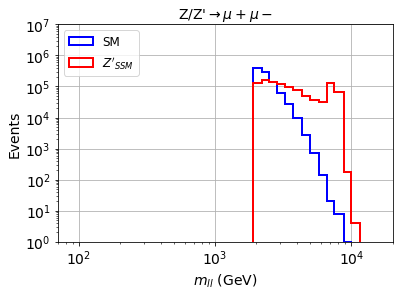

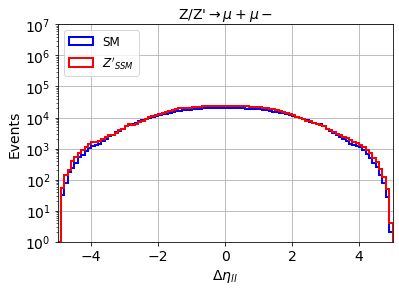

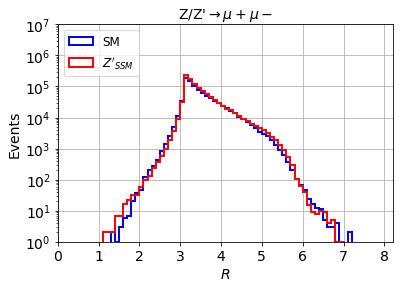

In [11]:
# NOW DATA IS CHECKED

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(invariant_mass_eeSSMZprime, bins=bins_atlas, lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2diffeta_eeSM, bins=100, range=[-5,5], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2diffeta_eeSSMZprime, bins=100, range=[-5,5], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$\Delta \eta_{ll}$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(-5,5)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2R_eeSM, bins=82, range=[0,8.2], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2R_eeSSMZprime, bins=82, range=[0,8.2], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$R$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(0.,8.2)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### Train-test-val datasets

In [12]:
# to normalize
scaler = preprocessing.MinMaxScaler()

# Number of data points (per-class) for the ML classifier
num_data = 750000



df = pd.DataFrame()

df['e1-pt']= np.concatenate([e1pt_eeSM[:num_data],e1pt_eeSSMZprime[:num_data]])
df['e1-eta']= np.concatenate([e1eta_eeSM[:num_data],e1eta_eeSSMZprime[:num_data]])
df['e1-phi']= np.concatenate([e1phi_eeSM[:num_data],e1phi_eeSSMZprime[:num_data]])

df['e2-pt']= np.concatenate([e2pt_eeSM[:num_data],e2pt_eeSSMZprime[:num_data]])
df['e2-eta']= np.concatenate([e2eta_eeSM[:num_data],e2eta_eeSSMZprime[:num_data]])
df['e2-phi']= np.concatenate([e2phi_eeSM[:num_data],e2phi_eeSSMZprime[:num_data]])

df['mll']= np.concatenate([invariant_mass_eeSM[:num_data],invariant_mass_eeSSMZprime[:num_data]])
df['delta-eta']= np.concatenate([e1e2diffeta_eeSM[:num_data],e1e2diffeta_eeSSMZprime[:num_data]])
df['R']= np.concatenate([e1e2R_eeSM[:num_data],e1e2R_eeSSMZprime[:num_data]])

df['Y'] = np.concatenate([np.zeros(num_data),np.ones(num_data)])


# remove the used data
del e1pt_eeSM
del e1eta_eeSM
del e1phi_eeSM

del e2pt_eeSM
del e2eta_eeSM
del e2phi_eeSM

del e1pt_eeSSMZprime
del e1eta_eeSSMZprime
del e1phi_eeSSMZprime

del e2pt_eeSSMZprime
del e2eta_eeSSMZprime
del e2phi_eeSSMZprime


# NORMALIZE
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi','mll','delta-eta','R','Y'])


# print df to see the data
print(df)


# X and Y for the classifier
X_mon = df[['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi']].values
y_mon = df[['Y']].values

del df

# divide into train-val and test data samples
test_ratio = 1./3
val_ratio = 0.25


X_mon_aux, X_mon_test, y_mon_aux, y_mon_test = train_test_split(X_mon,
                                                                y_mon,
                                                                test_size=test_ratio,
                                                                random_state=42,
                                                                #stratify = y_mon,
                                                                shuffle=True)


X_mon_train, X_mon_val, y_mon_train, y_mon_val = train_test_split(X_mon_aux,
                                                                  y_mon_aux,
                                                                  test_size=val_ratio,
                                                                  random_state=42,
                                                                  #stratify = y_mon_aux,
                                                                  shuffle=True)


print('')
print('X_mon_train : ', X_mon_train.shape)
print('y_mon_train : ', y_mon_train.shape)
print('X_mon_val : ', X_mon_val.shape)
print('y_mon_val : ', y_mon_val.shape)
print('X_mon_test : ', X_mon_test.shape)
print('y_mon_test : ', y_mon_test.shape)
print('')

            e1-pt    e1-eta    e1-phi     e2-pt    e2-eta    e2-phi       mll  \
0        0.163217  0.458097  0.458625  0.185847  0.617409  0.964036  0.010433   
1        0.093000  0.242713  0.782623  0.118373  0.738462  0.299013  0.041444   
2        0.208214  0.516397  0.277371  0.233014  0.470648  0.789306  0.049767   
3        0.130358  0.424089  0.408498  0.155080  0.895951  0.924570  0.107524   
4        0.183409  0.415182  0.181254  0.202220  0.386235  0.636219  0.011863   
...           ...       ...       ...       ...       ...       ...       ...   
1499995  0.051284  0.858704  0.038511  0.075647  0.242915  0.539784  0.004394   
1499996  0.218845  0.515385  0.253978  0.237459  0.413360  0.746976  0.067138   
1499997  0.193621  0.521660  0.126512  0.213531  0.396761  0.630013  0.040473   
1499998  0.155749  0.327126  0.427435  0.172170  0.742915  0.925207  0.111070   
1499999  0.158498  0.356073  0.972470  0.181147  0.598988  0.470719  0.029693   

         delta-eta         

### XGBoost (per-event)

##### For 1 ML

/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67105	validation_1-logloss:0.67095
[1]	validation_0-logloss:0.65202	validation_1-logloss:0.65211
[2]	validation_0-logloss:0.63639	validation_1-logloss:0.63646
[3]	validation_0-logloss:0.62340	validation_1-logloss:0.62367
[4]	validation_0-logloss:0.61264	validation_1-logloss:0.61285
[5]	validation_0-logloss:0.60336	validation_1-logloss:0.60354
[6]	validation_0-logloss:0.59534	validation_1-logloss:0.59551
[7]	validation_0-logloss:0.58814	validation_1-logloss:0.58845
[8]	validation_0-logloss:0.58183	validation_1-logloss:0.58209
[9]	validation_0-logloss:0.57659	validation_1-logloss:0.57691
[10]	validation_0-logloss:0.57169	validation_1-logloss:0.57204
[11]	validation_0-logloss:0.56752	validation_1-logloss:0.56791
[12]	validation_0-logloss:0.56370	validation_1-logloss:0.56414
[13]	validation_0-logloss:0.56041	validation_1-logloss:0.56087
[14]	validation_0-logloss:0.55754	validation_1-logloss:0.55805
[15]	validation_0-logloss:0.55507	validation_1-logloss:0.55558
[1

[130]	validation_0-logloss:0.51247	validation_1-logloss:0.51524
[131]	validation_0-logloss:0.51245	validation_1-logloss:0.51523
[132]	validation_0-logloss:0.51241	validation_1-logloss:0.51522
[133]	validation_0-logloss:0.51238	validation_1-logloss:0.51520
[134]	validation_0-logloss:0.51235	validation_1-logloss:0.51519
[135]	validation_0-logloss:0.51232	validation_1-logloss:0.51518
[136]	validation_0-logloss:0.51229	validation_1-logloss:0.51517
[137]	validation_0-logloss:0.51225	validation_1-logloss:0.51515
[138]	validation_0-logloss:0.51223	validation_1-logloss:0.51514
[139]	validation_0-logloss:0.51216	validation_1-logloss:0.51508
[140]	validation_0-logloss:0.51213	validation_1-logloss:0.51508
[141]	validation_0-logloss:0.51204	validation_1-logloss:0.51502
[142]	validation_0-logloss:0.51202	validation_1-logloss:0.51500
[143]	validation_0-logloss:0.51198	validation_1-logloss:0.51497
[144]	validation_0-logloss:0.51196	validation_1-logloss:0.51496
[145]	validation_0-logloss:0.51193	valid

[259]	validation_0-logloss:0.50971	validation_1-logloss:0.51448
[260]	validation_0-logloss:0.50970	validation_1-logloss:0.51448
[261]	validation_0-logloss:0.50969	validation_1-logloss:0.51448
[262]	validation_0-logloss:0.50967	validation_1-logloss:0.51448
[263]	validation_0-logloss:0.50966	validation_1-logloss:0.51448
[264]	validation_0-logloss:0.50964	validation_1-logloss:0.51448
[265]	validation_0-logloss:0.50962	validation_1-logloss:0.51448
[266]	validation_0-logloss:0.50962	validation_1-logloss:0.51448
[267]	validation_0-logloss:0.50959	validation_1-logloss:0.51448
[268]	validation_0-logloss:0.50957	validation_1-logloss:0.51448
[269]	validation_0-logloss:0.50955	validation_1-logloss:0.51448
[270]	validation_0-logloss:0.50954	validation_1-logloss:0.51448
[271]	validation_0-logloss:0.50953	validation_1-logloss:0.51448
[272]	validation_0-logloss:0.50952	validation_1-logloss:0.51448
[273]	validation_0-logloss:0.50950	validation_1-logloss:0.51448
[274]	validation_0-logloss:0.50948	valid

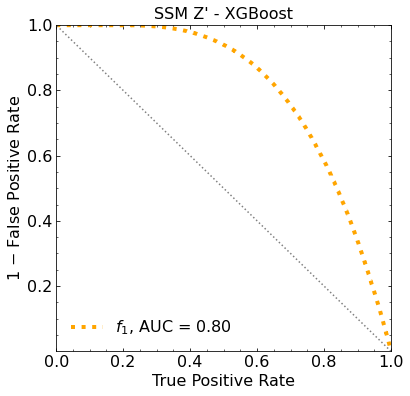

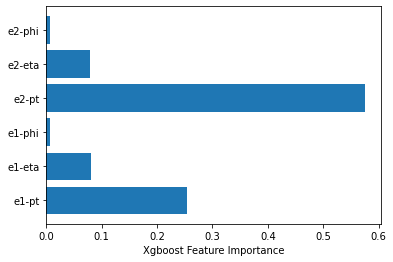

In [13]:
# XGBoost with only the kinematic variables of the leptons

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_mon_train,y_mon_train,eval_set=[(X_mon_train, y_mon_train), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_1ML = classifier.predict_proba(X_mon_test).T[1]


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_1ML)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




feature_names = np.array(['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi'])
plt.barh(feature_names, classifier.feature_importances_)
plt.xlabel("Xgboost Feature Importance")
plt.show()

##### For 10 ML

ML iteration 1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67072	validation_1-logloss:0.67090
[1]	validation_0-logloss:0.65286	validation_1-logloss:0.65286
[2]	validation_0-logloss:0.63751	validation_1-logloss:0.63760
[3]	validation_0-logloss:0.62475	validation_1-logloss:0.62491
[4]	validation_0-logloss:0.61383	validation_1-logloss:0.61398
[5]	validation_0-logloss:0.60460	validation_1-logloss:0.60478
[6]	validation_0-logloss:0.59659	validation_1-logloss:0.59685
[7]	validation_0-logloss:0.58966	validation_1-logloss:0.58998
[8]	validation_0-logloss:0.58351	validation_1-logloss:0.58384
[9]	validation_0-logloss:0.57825	validation_1-logloss:0.57860
[10]	validation_0-logloss:0.57350	validation_1-logloss:0.57395
[11]	validation_0-logloss:0.56931	validation_1-logloss:0.56976
[12]	validation_0-logloss:0.56533	validation_1-logloss:0.56577
[13]	validation_0-logloss:0.56184	validation_1-logloss:0.56236
[14]	validation_0-logloss:0.55872	validation_1-logloss:0.55930
[15]	validation_0-logloss:0.55618	validation_1-logloss:0.55679
[1

[130]	validation_0-logloss:0.51112	validation_1-logloss:0.51575
[131]	validation_0-logloss:0.51109	validation_1-logloss:0.51573
[132]	validation_0-logloss:0.51105	validation_1-logloss:0.51572
[133]	validation_0-logloss:0.51101	validation_1-logloss:0.51571
[134]	validation_0-logloss:0.51097	validation_1-logloss:0.51569
[135]	validation_0-logloss:0.51091	validation_1-logloss:0.51569
[136]	validation_0-logloss:0.51085	validation_1-logloss:0.51568
[137]	validation_0-logloss:0.51082	validation_1-logloss:0.51567
[138]	validation_0-logloss:0.51078	validation_1-logloss:0.51567
[139]	validation_0-logloss:0.51074	validation_1-logloss:0.51567
[140]	validation_0-logloss:0.51073	validation_1-logloss:0.51567
[141]	validation_0-logloss:0.51061	validation_1-logloss:0.51560
[142]	validation_0-logloss:0.51056	validation_1-logloss:0.51559
[143]	validation_0-logloss:0.51052	validation_1-logloss:0.51559
[144]	validation_0-logloss:0.51041	validation_1-logloss:0.51551
[145]	validation_0-logloss:0.51037	valid

[259]	validation_0-logloss:0.50647	validation_1-logloss:0.51513
[260]	validation_0-logloss:0.50646	validation_1-logloss:0.51513
[261]	validation_0-logloss:0.50643	validation_1-logloss:0.51513
[262]	validation_0-logloss:0.50641	validation_1-logloss:0.51513
[263]	validation_0-logloss:0.50639	validation_1-logloss:0.51514
[264]	validation_0-logloss:0.50636	validation_1-logloss:0.51514
[265]	validation_0-logloss:0.50632	validation_1-logloss:0.51513
[266]	validation_0-logloss:0.50629	validation_1-logloss:0.51513
[267]	validation_0-logloss:0.50624	validation_1-logloss:0.51511
[268]	validation_0-logloss:0.50621	validation_1-logloss:0.51511
[269]	validation_0-logloss:0.50619	validation_1-logloss:0.51511
[270]	validation_0-logloss:0.50614	validation_1-logloss:0.51512
[271]	validation_0-logloss:0.50608	validation_1-logloss:0.51511
[272]	validation_0-logloss:0.50605	validation_1-logloss:0.51511
[273]	validation_0-logloss:0.50603	validation_1-logloss:0.51511
[274]	validation_0-logloss:0.50599	valid

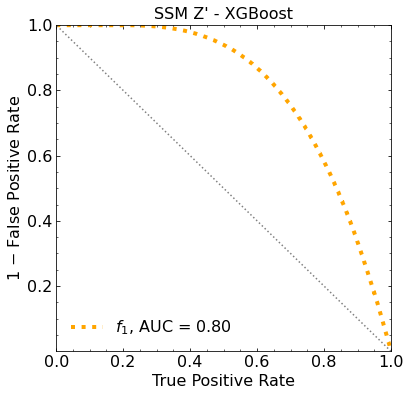


 ########################################

ML iteration  1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67086	validation_1-logloss:0.67105
[1]	validation_0-logloss:0.65256	validation_1-logloss:0.65270
[2]	validation_0-logloss:0.63733	validation_1-logloss:0.63750
[3]	validation_0-logloss:0.62444	validation_1-logloss:0.62462
[4]	validation_0-logloss:0.61361	validation_1-logloss:0.61376
[5]	validation_0-logloss:0.60437	validation_1-logloss:0.60452
[6]	validation_0-logloss:0.59620	validation_1-logloss:0.59637
[7]	validation_0-logloss:0.58909	validation_1-logloss:0.58929
[8]	validation_0-logloss:0.58266	validation_1-logloss:0.58291
[9]	validation_0-logloss:0.57722	validation_1-logloss:0.57749
[10]	validation_0-logloss:0.57257	validation_1-logloss:0.57291
[11]	validation_0-logloss:0.56838	validation_1-logloss:0.56876
[12]	validation_0-logloss:0.56445	validation_1-logloss:0.56490
[13]	validation_0-logloss:0.56104	validation_1-logloss:0.56151
[14]	validation_0-logloss:0.55787	validation_1-logloss:0.55842
[15]	validation_0-logloss:0.55538	validation_1-logloss:0.55599
[1

[130]	validation_0-logloss:0.51131	validation_1-logloss:0.51609
[131]	validation_0-logloss:0.51127	validation_1-logloss:0.51609
[132]	validation_0-logloss:0.51123	validation_1-logloss:0.51609
[133]	validation_0-logloss:0.51118	validation_1-logloss:0.51606
[134]	validation_0-logloss:0.51116	validation_1-logloss:0.51606
[135]	validation_0-logloss:0.51112	validation_1-logloss:0.51606
[136]	validation_0-logloss:0.51098	validation_1-logloss:0.51596
[137]	validation_0-logloss:0.51094	validation_1-logloss:0.51594
[138]	validation_0-logloss:0.51091	validation_1-logloss:0.51594
[139]	validation_0-logloss:0.51088	validation_1-logloss:0.51593
[140]	validation_0-logloss:0.51087	validation_1-logloss:0.51592
[141]	validation_0-logloss:0.51084	validation_1-logloss:0.51592
[142]	validation_0-logloss:0.51081	validation_1-logloss:0.51592
[143]	validation_0-logloss:0.51078	validation_1-logloss:0.51592
[144]	validation_0-logloss:0.51075	validation_1-logloss:0.51591
[145]	validation_0-logloss:0.51062	valid

[259]	validation_0-logloss:0.50693	validation_1-logloss:0.51541
[260]	validation_0-logloss:0.50687	validation_1-logloss:0.51539
[261]	validation_0-logloss:0.50684	validation_1-logloss:0.51539
[262]	validation_0-logloss:0.50682	validation_1-logloss:0.51540
[263]	validation_0-logloss:0.50681	validation_1-logloss:0.51540
[264]	validation_0-logloss:0.50679	validation_1-logloss:0.51540
[265]	validation_0-logloss:0.50675	validation_1-logloss:0.51539
[266]	validation_0-logloss:0.50671	validation_1-logloss:0.51539
[267]	validation_0-logloss:0.50667	validation_1-logloss:0.51539
[268]	validation_0-logloss:0.50664	validation_1-logloss:0.51538
[269]	validation_0-logloss:0.50661	validation_1-logloss:0.51539
[270]	validation_0-logloss:0.50657	validation_1-logloss:0.51539
[271]	validation_0-logloss:0.50654	validation_1-logloss:0.51540
[272]	validation_0-logloss:0.50652	validation_1-logloss:0.51540
[273]	validation_0-logloss:0.50648	validation_1-logloss:0.51541
[274]	validation_0-logloss:0.50643	valid

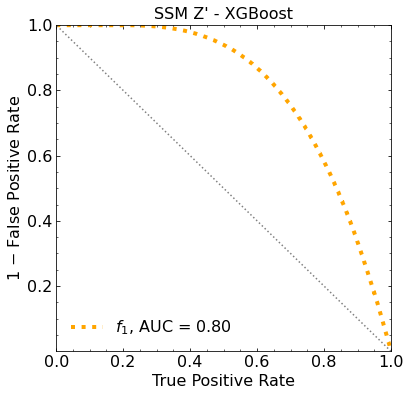


 ########################################

ML iteration  2


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67025	validation_1-logloss:0.67028
[1]	validation_0-logloss:0.65121	validation_1-logloss:0.65137
[2]	validation_0-logloss:0.63576	validation_1-logloss:0.63608
[3]	validation_0-logloss:0.62284	validation_1-logloss:0.62326
[4]	validation_0-logloss:0.61176	validation_1-logloss:0.61232
[5]	validation_0-logloss:0.60236	validation_1-logloss:0.60290
[6]	validation_0-logloss:0.59439	validation_1-logloss:0.59501
[7]	validation_0-logloss:0.58732	validation_1-logloss:0.58803
[8]	validation_0-logloss:0.58121	validation_1-logloss:0.58199
[9]	validation_0-logloss:0.57590	validation_1-logloss:0.57675
[10]	validation_0-logloss:0.57109	validation_1-logloss:0.57203
[11]	validation_0-logloss:0.56675	validation_1-logloss:0.56777
[12]	validation_0-logloss:0.56286	validation_1-logloss:0.56397
[13]	validation_0-logloss:0.55955	validation_1-logloss:0.56070
[14]	validation_0-logloss:0.55653	validation_1-logloss:0.55774
[15]	validation_0-logloss:0.55377	validation_1-logloss:0.55503
[1

[130]	validation_0-logloss:0.50994	validation_1-logloss:0.51579
[131]	validation_0-logloss:0.50984	validation_1-logloss:0.51574
[132]	validation_0-logloss:0.50979	validation_1-logloss:0.51572
[133]	validation_0-logloss:0.50974	validation_1-logloss:0.51571
[134]	validation_0-logloss:0.50971	validation_1-logloss:0.51570
[135]	validation_0-logloss:0.50966	validation_1-logloss:0.51568
[136]	validation_0-logloss:0.50963	validation_1-logloss:0.51567
[137]	validation_0-logloss:0.50959	validation_1-logloss:0.51567
[138]	validation_0-logloss:0.50953	validation_1-logloss:0.51566
[139]	validation_0-logloss:0.50948	validation_1-logloss:0.51565
[140]	validation_0-logloss:0.50944	validation_1-logloss:0.51564
[141]	validation_0-logloss:0.50941	validation_1-logloss:0.51563
[142]	validation_0-logloss:0.50936	validation_1-logloss:0.51563
[143]	validation_0-logloss:0.50931	validation_1-logloss:0.51561
[144]	validation_0-logloss:0.50928	validation_1-logloss:0.51561
[145]	validation_0-logloss:0.50923	valid

[259]	validation_0-logloss:0.50524	validation_1-logloss:0.51523
[260]	validation_0-logloss:0.50520	validation_1-logloss:0.51523
[261]	validation_0-logloss:0.50516	validation_1-logloss:0.51522
[262]	validation_0-logloss:0.50512	validation_1-logloss:0.51523
[263]	validation_0-logloss:0.50510	validation_1-logloss:0.51523
[264]	validation_0-logloss:0.50507	validation_1-logloss:0.51523
[265]	validation_0-logloss:0.50503	validation_1-logloss:0.51523
[266]	validation_0-logloss:0.50497	validation_1-logloss:0.51522
[267]	validation_0-logloss:0.50495	validation_1-logloss:0.51522
[268]	validation_0-logloss:0.50492	validation_1-logloss:0.51522
[269]	validation_0-logloss:0.50490	validation_1-logloss:0.51522
[270]	validation_0-logloss:0.50488	validation_1-logloss:0.51523
[271]	validation_0-logloss:0.50484	validation_1-logloss:0.51523
[272]	validation_0-logloss:0.50479	validation_1-logloss:0.51523
[273]	validation_0-logloss:0.50476	validation_1-logloss:0.51524
[274]	validation_0-logloss:0.50475	valid

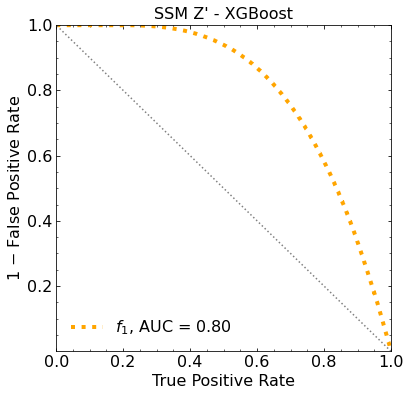


 ########################################

ML iteration  3


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67072	validation_1-logloss:0.67072
[1]	validation_0-logloss:0.65227	validation_1-logloss:0.65243
[2]	validation_0-logloss:0.63697	validation_1-logloss:0.63728
[3]	validation_0-logloss:0.62358	validation_1-logloss:0.62401
[4]	validation_0-logloss:0.61258	validation_1-logloss:0.61315
[5]	validation_0-logloss:0.60345	validation_1-logloss:0.60397
[6]	validation_0-logloss:0.59547	validation_1-logloss:0.59609
[7]	validation_0-logloss:0.58854	validation_1-logloss:0.58927
[8]	validation_0-logloss:0.58208	validation_1-logloss:0.58284
[9]	validation_0-logloss:0.57661	validation_1-logloss:0.57742
[10]	validation_0-logloss:0.57190	validation_1-logloss:0.57279
[11]	validation_0-logloss:0.56748	validation_1-logloss:0.56849
[12]	validation_0-logloss:0.56382	validation_1-logloss:0.56487
[13]	validation_0-logloss:0.56042	validation_1-logloss:0.56151
[14]	validation_0-logloss:0.55727	validation_1-logloss:0.55843
[15]	validation_0-logloss:0.55467	validation_1-logloss:0.55587
[1

[130]	validation_0-logloss:0.51018	validation_1-logloss:0.51590
[131]	validation_0-logloss:0.51015	validation_1-logloss:0.51589
[132]	validation_0-logloss:0.51011	validation_1-logloss:0.51589
[133]	validation_0-logloss:0.51006	validation_1-logloss:0.51587
[134]	validation_0-logloss:0.51001	validation_1-logloss:0.51586
[135]	validation_0-logloss:0.50998	validation_1-logloss:0.51585
[136]	validation_0-logloss:0.50993	validation_1-logloss:0.51583
[137]	validation_0-logloss:0.50989	validation_1-logloss:0.51583
[138]	validation_0-logloss:0.50986	validation_1-logloss:0.51583
[139]	validation_0-logloss:0.50982	validation_1-logloss:0.51583
[140]	validation_0-logloss:0.50976	validation_1-logloss:0.51581
[141]	validation_0-logloss:0.50972	validation_1-logloss:0.51580
[142]	validation_0-logloss:0.50966	validation_1-logloss:0.51580
[143]	validation_0-logloss:0.50960	validation_1-logloss:0.51578
[144]	validation_0-logloss:0.50957	validation_1-logloss:0.51577
[145]	validation_0-logloss:0.50953	valid

[259]	validation_0-logloss:0.50552	validation_1-logloss:0.51531
[260]	validation_0-logloss:0.50549	validation_1-logloss:0.51532
[261]	validation_0-logloss:0.50545	validation_1-logloss:0.51531
[262]	validation_0-logloss:0.50543	validation_1-logloss:0.51531
[263]	validation_0-logloss:0.50540	validation_1-logloss:0.51532
[264]	validation_0-logloss:0.50539	validation_1-logloss:0.51532
[265]	validation_0-logloss:0.50535	validation_1-logloss:0.51531
[266]	validation_0-logloss:0.50532	validation_1-logloss:0.51532
[267]	validation_0-logloss:0.50525	validation_1-logloss:0.51529
[268]	validation_0-logloss:0.50520	validation_1-logloss:0.51529
[269]	validation_0-logloss:0.50516	validation_1-logloss:0.51530
[270]	validation_0-logloss:0.50512	validation_1-logloss:0.51529
[271]	validation_0-logloss:0.50509	validation_1-logloss:0.51529
[272]	validation_0-logloss:0.50505	validation_1-logloss:0.51530
[273]	validation_0-logloss:0.50504	validation_1-logloss:0.51529


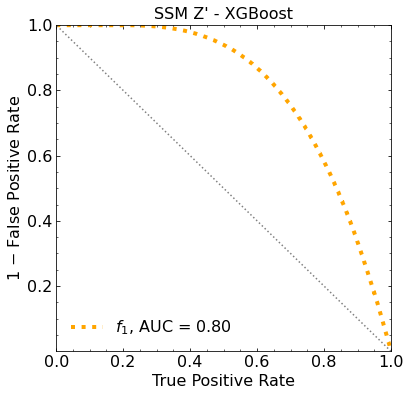


 ########################################

ML iteration  4


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67075	validation_1-logloss:0.67093
[1]	validation_0-logloss:0.65201	validation_1-logloss:0.65206
[2]	validation_0-logloss:0.63666	validation_1-logloss:0.63691
[3]	validation_0-logloss:0.62385	validation_1-logloss:0.62404
[4]	validation_0-logloss:0.61299	validation_1-logloss:0.61322
[5]	validation_0-logloss:0.60389	validation_1-logloss:0.60413
[6]	validation_0-logloss:0.59584	validation_1-logloss:0.59612
[7]	validation_0-logloss:0.58903	validation_1-logloss:0.58940
[8]	validation_0-logloss:0.58295	validation_1-logloss:0.58332
[9]	validation_0-logloss:0.57743	validation_1-logloss:0.57788
[10]	validation_0-logloss:0.57257	validation_1-logloss:0.57309
[11]	validation_0-logloss:0.56824	validation_1-logloss:0.56873
[12]	validation_0-logloss:0.56436	validation_1-logloss:0.56493
[13]	validation_0-logloss:0.56096	validation_1-logloss:0.56156
[14]	validation_0-logloss:0.55800	validation_1-logloss:0.55868
[15]	validation_0-logloss:0.55536	validation_1-logloss:0.55604
[1

[130]	validation_0-logloss:0.51093	validation_1-logloss:0.51574
[131]	validation_0-logloss:0.51089	validation_1-logloss:0.51573
[132]	validation_0-logloss:0.51084	validation_1-logloss:0.51572
[133]	validation_0-logloss:0.51080	validation_1-logloss:0.51572
[134]	validation_0-logloss:0.51075	validation_1-logloss:0.51572
[135]	validation_0-logloss:0.51070	validation_1-logloss:0.51573
[136]	validation_0-logloss:0.51067	validation_1-logloss:0.51573
[137]	validation_0-logloss:0.51057	validation_1-logloss:0.51568
[138]	validation_0-logloss:0.51053	validation_1-logloss:0.51567
[139]	validation_0-logloss:0.51048	validation_1-logloss:0.51567
[140]	validation_0-logloss:0.51044	validation_1-logloss:0.51566
[141]	validation_0-logloss:0.51040	validation_1-logloss:0.51564
[142]	validation_0-logloss:0.51037	validation_1-logloss:0.51564
[143]	validation_0-logloss:0.51033	validation_1-logloss:0.51562
[144]	validation_0-logloss:0.51029	validation_1-logloss:0.51562
[145]	validation_0-logloss:0.51023	valid

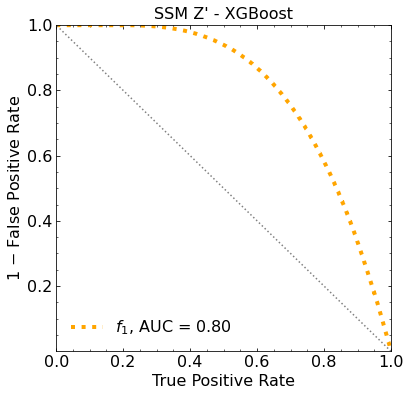


 ########################################

ML iteration  5


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67085	validation_1-logloss:0.67098
[1]	validation_0-logloss:0.65202	validation_1-logloss:0.65214
[2]	validation_0-logloss:0.63662	validation_1-logloss:0.63686
[3]	validation_0-logloss:0.62373	validation_1-logloss:0.62413
[4]	validation_0-logloss:0.61287	validation_1-logloss:0.61329
[5]	validation_0-logloss:0.60350	validation_1-logloss:0.60395
[6]	validation_0-logloss:0.59541	validation_1-logloss:0.59596
[7]	validation_0-logloss:0.58851	validation_1-logloss:0.58908
[8]	validation_0-logloss:0.58233	validation_1-logloss:0.58298
[9]	validation_0-logloss:0.57664	validation_1-logloss:0.57735
[10]	validation_0-logloss:0.57167	validation_1-logloss:0.57247
[11]	validation_0-logloss:0.56749	validation_1-logloss:0.56833
[12]	validation_0-logloss:0.56355	validation_1-logloss:0.56447
[13]	validation_0-logloss:0.56028	validation_1-logloss:0.56121
[14]	validation_0-logloss:0.55725	validation_1-logloss:0.55826
[15]	validation_0-logloss:0.55451	validation_1-logloss:0.55561
[1

[130]	validation_0-logloss:0.51066	validation_1-logloss:0.51591
[131]	validation_0-logloss:0.51055	validation_1-logloss:0.51584
[132]	validation_0-logloss:0.51052	validation_1-logloss:0.51584
[133]	validation_0-logloss:0.51048	validation_1-logloss:0.51583
[134]	validation_0-logloss:0.51044	validation_1-logloss:0.51582
[135]	validation_0-logloss:0.51039	validation_1-logloss:0.51582
[136]	validation_0-logloss:0.51036	validation_1-logloss:0.51579
[137]	validation_0-logloss:0.51030	validation_1-logloss:0.51578
[138]	validation_0-logloss:0.51026	validation_1-logloss:0.51578
[139]	validation_0-logloss:0.51023	validation_1-logloss:0.51578
[140]	validation_0-logloss:0.51019	validation_1-logloss:0.51576
[141]	validation_0-logloss:0.51009	validation_1-logloss:0.51571
[142]	validation_0-logloss:0.51005	validation_1-logloss:0.51570
[143]	validation_0-logloss:0.51002	validation_1-logloss:0.51570
[144]	validation_0-logloss:0.50999	validation_1-logloss:0.51570
[145]	validation_0-logloss:0.50995	valid

[259]	validation_0-logloss:0.50586	validation_1-logloss:0.51532
[260]	validation_0-logloss:0.50584	validation_1-logloss:0.51533
[261]	validation_0-logloss:0.50580	validation_1-logloss:0.51532
[262]	validation_0-logloss:0.50579	validation_1-logloss:0.51533
[263]	validation_0-logloss:0.50577	validation_1-logloss:0.51533
[264]	validation_0-logloss:0.50575	validation_1-logloss:0.51532
[265]	validation_0-logloss:0.50571	validation_1-logloss:0.51532
[266]	validation_0-logloss:0.50567	validation_1-logloss:0.51533
[267]	validation_0-logloss:0.50564	validation_1-logloss:0.51533
[268]	validation_0-logloss:0.50561	validation_1-logloss:0.51533
[269]	validation_0-logloss:0.50557	validation_1-logloss:0.51533
[270]	validation_0-logloss:0.50554	validation_1-logloss:0.51533
[271]	validation_0-logloss:0.50551	validation_1-logloss:0.51534
[272]	validation_0-logloss:0.50548	validation_1-logloss:0.51534
[273]	validation_0-logloss:0.50545	validation_1-logloss:0.51533
[274]	validation_0-logloss:0.50542	valid

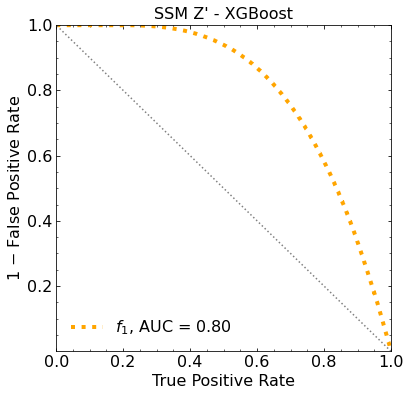


 ########################################

ML iteration  6


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67071	validation_1-logloss:0.67098
[1]	validation_0-logloss:0.65192	validation_1-logloss:0.65208
[2]	validation_0-logloss:0.63659	validation_1-logloss:0.63698
[3]	validation_0-logloss:0.62371	validation_1-logloss:0.62410
[4]	validation_0-logloss:0.61284	validation_1-logloss:0.61332
[5]	validation_0-logloss:0.60342	validation_1-logloss:0.60402
[6]	validation_0-logloss:0.59527	validation_1-logloss:0.59586
[7]	validation_0-logloss:0.58812	validation_1-logloss:0.58876
[8]	validation_0-logloss:0.58199	validation_1-logloss:0.58274
[9]	validation_0-logloss:0.57673	validation_1-logloss:0.57748
[10]	validation_0-logloss:0.57203	validation_1-logloss:0.57283
[11]	validation_0-logloss:0.56768	validation_1-logloss:0.56861
[12]	validation_0-logloss:0.56357	validation_1-logloss:0.56457
[13]	validation_0-logloss:0.56020	validation_1-logloss:0.56121
[14]	validation_0-logloss:0.55746	validation_1-logloss:0.55847
[15]	validation_0-logloss:0.55483	validation_1-logloss:0.55590
[1

[130]	validation_0-logloss:0.51068	validation_1-logloss:0.51594
[131]	validation_0-logloss:0.51063	validation_1-logloss:0.51592
[132]	validation_0-logloss:0.51056	validation_1-logloss:0.51591
[133]	validation_0-logloss:0.51052	validation_1-logloss:0.51590
[134]	validation_0-logloss:0.51048	validation_1-logloss:0.51588
[135]	validation_0-logloss:0.51043	validation_1-logloss:0.51588
[136]	validation_0-logloss:0.51039	validation_1-logloss:0.51587
[137]	validation_0-logloss:0.51037	validation_1-logloss:0.51587
[138]	validation_0-logloss:0.51033	validation_1-logloss:0.51586
[139]	validation_0-logloss:0.51028	validation_1-logloss:0.51585
[140]	validation_0-logloss:0.51023	validation_1-logloss:0.51583
[141]	validation_0-logloss:0.51020	validation_1-logloss:0.51583
[142]	validation_0-logloss:0.51015	validation_1-logloss:0.51582
[143]	validation_0-logloss:0.51003	validation_1-logloss:0.51574
[144]	validation_0-logloss:0.50999	validation_1-logloss:0.51573
[145]	validation_0-logloss:0.50996	valid

[259]	validation_0-logloss:0.50595	validation_1-logloss:0.51529
[260]	validation_0-logloss:0.50592	validation_1-logloss:0.51530
[261]	validation_0-logloss:0.50589	validation_1-logloss:0.51530
[262]	validation_0-logloss:0.50587	validation_1-logloss:0.51531
[263]	validation_0-logloss:0.50586	validation_1-logloss:0.51530
[264]	validation_0-logloss:0.50584	validation_1-logloss:0.51531
[265]	validation_0-logloss:0.50581	validation_1-logloss:0.51531
[266]	validation_0-logloss:0.50578	validation_1-logloss:0.51531
[267]	validation_0-logloss:0.50574	validation_1-logloss:0.51532
[268]	validation_0-logloss:0.50570	validation_1-logloss:0.51532
[269]	validation_0-logloss:0.50568	validation_1-logloss:0.51532
[270]	validation_0-logloss:0.50565	validation_1-logloss:0.51532
[271]	validation_0-logloss:0.50562	validation_1-logloss:0.51532
[272]	validation_0-logloss:0.50560	validation_1-logloss:0.51532
[273]	validation_0-logloss:0.50559	validation_1-logloss:0.51532
[274]	validation_0-logloss:0.50555	valid

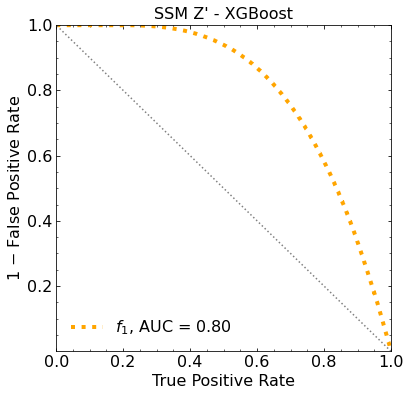


 ########################################

ML iteration  7


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67066	validation_1-logloss:0.67093
[1]	validation_0-logloss:0.65196	validation_1-logloss:0.65210
[2]	validation_0-logloss:0.63623	validation_1-logloss:0.63646
[3]	validation_0-logloss:0.62335	validation_1-logloss:0.62369
[4]	validation_0-logloss:0.61259	validation_1-logloss:0.61284
[5]	validation_0-logloss:0.60309	validation_1-logloss:0.60345
[6]	validation_0-logloss:0.59503	validation_1-logloss:0.59548
[7]	validation_0-logloss:0.58818	validation_1-logloss:0.58866
[8]	validation_0-logloss:0.58209	validation_1-logloss:0.58259
[9]	validation_0-logloss:0.57636	validation_1-logloss:0.57691
[10]	validation_0-logloss:0.57147	validation_1-logloss:0.57209
[11]	validation_0-logloss:0.56712	validation_1-logloss:0.56779
[12]	validation_0-logloss:0.56358	validation_1-logloss:0.56434
[13]	validation_0-logloss:0.56014	validation_1-logloss:0.56089
[14]	validation_0-logloss:0.55735	validation_1-logloss:0.55816
[15]	validation_0-logloss:0.55463	validation_1-logloss:0.55547
[1

[130]	validation_0-logloss:0.51046	validation_1-logloss:0.51572
[131]	validation_0-logloss:0.51041	validation_1-logloss:0.51571
[132]	validation_0-logloss:0.51038	validation_1-logloss:0.51570
[133]	validation_0-logloss:0.51030	validation_1-logloss:0.51563
[134]	validation_0-logloss:0.51023	validation_1-logloss:0.51561
[135]	validation_0-logloss:0.51018	validation_1-logloss:0.51560
[136]	validation_0-logloss:0.51015	validation_1-logloss:0.51561
[137]	validation_0-logloss:0.51010	validation_1-logloss:0.51560
[138]	validation_0-logloss:0.51005	validation_1-logloss:0.51560
[139]	validation_0-logloss:0.51002	validation_1-logloss:0.51559
[140]	validation_0-logloss:0.50997	validation_1-logloss:0.51557
[141]	validation_0-logloss:0.50994	validation_1-logloss:0.51556
[142]	validation_0-logloss:0.50989	validation_1-logloss:0.51556
[143]	validation_0-logloss:0.50983	validation_1-logloss:0.51552
[144]	validation_0-logloss:0.50977	validation_1-logloss:0.51550
[145]	validation_0-logloss:0.50974	valid

[259]	validation_0-logloss:0.50588	validation_1-logloss:0.51509
[260]	validation_0-logloss:0.50585	validation_1-logloss:0.51509
[261]	validation_0-logloss:0.50581	validation_1-logloss:0.51509
[262]	validation_0-logloss:0.50576	validation_1-logloss:0.51509
[263]	validation_0-logloss:0.50575	validation_1-logloss:0.51509
[264]	validation_0-logloss:0.50572	validation_1-logloss:0.51509
[265]	validation_0-logloss:0.50569	validation_1-logloss:0.51510
[266]	validation_0-logloss:0.50567	validation_1-logloss:0.51509
[267]	validation_0-logloss:0.50564	validation_1-logloss:0.51510
[268]	validation_0-logloss:0.50561	validation_1-logloss:0.51510
[269]	validation_0-logloss:0.50560	validation_1-logloss:0.51510
[270]	validation_0-logloss:0.50560	validation_1-logloss:0.51510
[271]	validation_0-logloss:0.50557	validation_1-logloss:0.51511
[272]	validation_0-logloss:0.50555	validation_1-logloss:0.51511
[273]	validation_0-logloss:0.50552	validation_1-logloss:0.51511
[274]	validation_0-logloss:0.50550	valid

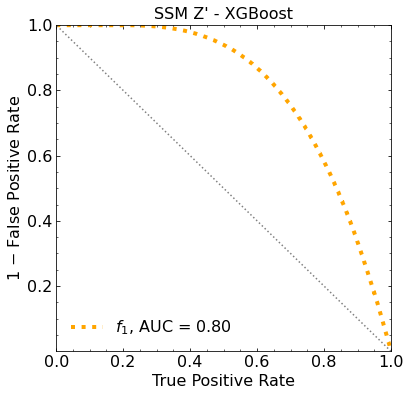


 ########################################

ML iteration  8


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67027	validation_1-logloss:0.67038
[1]	validation_0-logloss:0.65214	validation_1-logloss:0.65223
[2]	validation_0-logloss:0.63628	validation_1-logloss:0.63662
[3]	validation_0-logloss:0.62347	validation_1-logloss:0.62387
[4]	validation_0-logloss:0.61264	validation_1-logloss:0.61302
[5]	validation_0-logloss:0.60335	validation_1-logloss:0.60370
[6]	validation_0-logloss:0.59506	validation_1-logloss:0.59548
[7]	validation_0-logloss:0.58809	validation_1-logloss:0.58856
[8]	validation_0-logloss:0.58176	validation_1-logloss:0.58223
[9]	validation_0-logloss:0.57622	validation_1-logloss:0.57679
[10]	validation_0-logloss:0.57130	validation_1-logloss:0.57188
[11]	validation_0-logloss:0.56722	validation_1-logloss:0.56789
[12]	validation_0-logloss:0.56349	validation_1-logloss:0.56419
[13]	validation_0-logloss:0.56025	validation_1-logloss:0.56093
[14]	validation_0-logloss:0.55736	validation_1-logloss:0.55808
[15]	validation_0-logloss:0.55485	validation_1-logloss:0.55565
[1

[130]	validation_0-logloss:0.51107	validation_1-logloss:0.51600
[131]	validation_0-logloss:0.51103	validation_1-logloss:0.51599
[132]	validation_0-logloss:0.51097	validation_1-logloss:0.51598
[133]	validation_0-logloss:0.51091	validation_1-logloss:0.51594
[134]	validation_0-logloss:0.51085	validation_1-logloss:0.51594
[135]	validation_0-logloss:0.51081	validation_1-logloss:0.51594
[136]	validation_0-logloss:0.51074	validation_1-logloss:0.51592
[137]	validation_0-logloss:0.51069	validation_1-logloss:0.51589
[138]	validation_0-logloss:0.51063	validation_1-logloss:0.51588
[139]	validation_0-logloss:0.51058	validation_1-logloss:0.51588
[140]	validation_0-logloss:0.51055	validation_1-logloss:0.51588
[141]	validation_0-logloss:0.51048	validation_1-logloss:0.51584
[142]	validation_0-logloss:0.51044	validation_1-logloss:0.51585
[143]	validation_0-logloss:0.51040	validation_1-logloss:0.51585
[144]	validation_0-logloss:0.51038	validation_1-logloss:0.51584
[145]	validation_0-logloss:0.51033	valid

[259]	validation_0-logloss:0.50656	validation_1-logloss:0.51542
[260]	validation_0-logloss:0.50654	validation_1-logloss:0.51542
[261]	validation_0-logloss:0.50651	validation_1-logloss:0.51542
[262]	validation_0-logloss:0.50649	validation_1-logloss:0.51541
[263]	validation_0-logloss:0.50645	validation_1-logloss:0.51542
[264]	validation_0-logloss:0.50643	validation_1-logloss:0.51542
[265]	validation_0-logloss:0.50640	validation_1-logloss:0.51542
[266]	validation_0-logloss:0.50637	validation_1-logloss:0.51542
[267]	validation_0-logloss:0.50634	validation_1-logloss:0.51542
[268]	validation_0-logloss:0.50631	validation_1-logloss:0.51542
[269]	validation_0-logloss:0.50629	validation_1-logloss:0.51542
[270]	validation_0-logloss:0.50625	validation_1-logloss:0.51541
[271]	validation_0-logloss:0.50623	validation_1-logloss:0.51541
[272]	validation_0-logloss:0.50621	validation_1-logloss:0.51541
[273]	validation_0-logloss:0.50619	validation_1-logloss:0.51541
[274]	validation_0-logloss:0.50617	valid

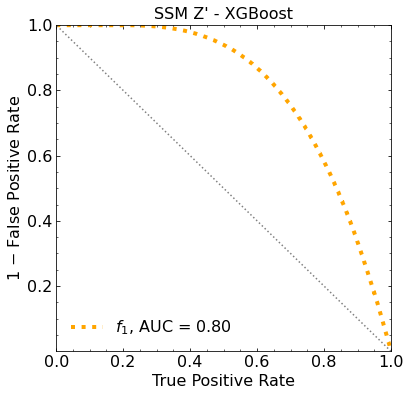


 ########################################

ML iteration  9


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67094	validation_1-logloss:0.67093
[1]	validation_0-logloss:0.65198	validation_1-logloss:0.65206
[2]	validation_0-logloss:0.63677	validation_1-logloss:0.63696
[3]	validation_0-logloss:0.62406	validation_1-logloss:0.62423
[4]	validation_0-logloss:0.61328	validation_1-logloss:0.61351
[5]	validation_0-logloss:0.60393	validation_1-logloss:0.60411
[6]	validation_0-logloss:0.59564	validation_1-logloss:0.59586
[7]	validation_0-logloss:0.58852	validation_1-logloss:0.58888
[8]	validation_0-logloss:0.58220	validation_1-logloss:0.58252
[9]	validation_0-logloss:0.57678	validation_1-logloss:0.57718
[10]	validation_0-logloss:0.57204	validation_1-logloss:0.57251
[11]	validation_0-logloss:0.56788	validation_1-logloss:0.56838
[12]	validation_0-logloss:0.56413	validation_1-logloss:0.56467
[13]	validation_0-logloss:0.56068	validation_1-logloss:0.56119
[14]	validation_0-logloss:0.55785	validation_1-logloss:0.55841
[15]	validation_0-logloss:0.55535	validation_1-logloss:0.55595
[1

[130]	validation_0-logloss:0.51108	validation_1-logloss:0.51579
[131]	validation_0-logloss:0.51103	validation_1-logloss:0.51578
[132]	validation_0-logloss:0.51098	validation_1-logloss:0.51577
[133]	validation_0-logloss:0.51095	validation_1-logloss:0.51576
[134]	validation_0-logloss:0.51091	validation_1-logloss:0.51576
[135]	validation_0-logloss:0.51086	validation_1-logloss:0.51575
[136]	validation_0-logloss:0.51081	validation_1-logloss:0.51575
[137]	validation_0-logloss:0.51074	validation_1-logloss:0.51570
[138]	validation_0-logloss:0.51070	validation_1-logloss:0.51569
[139]	validation_0-logloss:0.51067	validation_1-logloss:0.51568
[140]	validation_0-logloss:0.51062	validation_1-logloss:0.51567
[141]	validation_0-logloss:0.51058	validation_1-logloss:0.51566
[142]	validation_0-logloss:0.51057	validation_1-logloss:0.51566
[143]	validation_0-logloss:0.51052	validation_1-logloss:0.51564
[144]	validation_0-logloss:0.51050	validation_1-logloss:0.51565
[145]	validation_0-logloss:0.51046	valid

[259]	validation_0-logloss:0.50659	validation_1-logloss:0.51521
[260]	validation_0-logloss:0.50657	validation_1-logloss:0.51521
[261]	validation_0-logloss:0.50653	validation_1-logloss:0.51520
[262]	validation_0-logloss:0.50650	validation_1-logloss:0.51520
[263]	validation_0-logloss:0.50649	validation_1-logloss:0.51520
[264]	validation_0-logloss:0.50648	validation_1-logloss:0.51520
[265]	validation_0-logloss:0.50647	validation_1-logloss:0.51520
[266]	validation_0-logloss:0.50643	validation_1-logloss:0.51520
[267]	validation_0-logloss:0.50639	validation_1-logloss:0.51520
[268]	validation_0-logloss:0.50638	validation_1-logloss:0.51521
[269]	validation_0-logloss:0.50635	validation_1-logloss:0.51520
[270]	validation_0-logloss:0.50632	validation_1-logloss:0.51521
[271]	validation_0-logloss:0.50627	validation_1-logloss:0.51519
[272]	validation_0-logloss:0.50625	validation_1-logloss:0.51518
[273]	validation_0-logloss:0.50624	validation_1-logloss:0.51518
[274]	validation_0-logloss:0.50621	valid

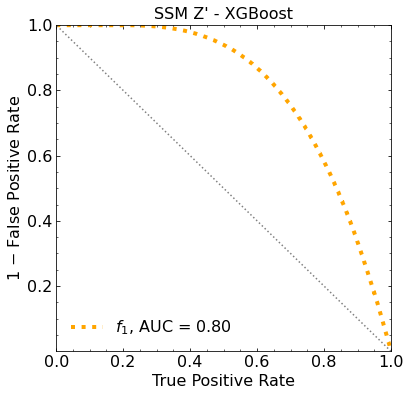


 ########################################



In [14]:
# XGBoost with only the kinematic variables of the leptons

iterations_ML = 10

print('ML iteration 1')

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

# FIT
classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_aux = classifier.predict_proba(X_mon_test).T[1]
y_pred_xg_auxRE = np.reshape(y_pred_xg_aux, (1,len(y_pred_xg_aux)))


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




print('\n ########################################\n')





for it in range(1,iterations_ML):

    print('ML iteration ', it)
    
    # CLASSIFIER
    classifier = XGBClassifier(
        n_estimators=2500,
        learning_rate=0.1,
        reg_lambda=0.0,reg_alpha=0.0,
        gamma=0.0,objective='binary:logistic',
        max_depth=5)

    ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

    # FIT
    classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
            eval_metric='logloss',early_stopping_rounds=50,#early stopping
            verbose=True)

    # PREDICTIONS
    y_pred_xg_aux_it = classifier.predict_proba(X_mon_test).T[1]
    y_pred_xg_auxRE_it = np.reshape(y_pred_xg_aux_it, (1,len(y_pred_xg_aux_it)))
    
    y_pred_xg_auxRE = np.concatenate([y_pred_xg_auxRE,y_pred_xg_auxRE_it])


    # ROC
    fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
    roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


    # PLOT THE ROC WITH AUC
    fig = plt.figure(figsize=(6, 6))
    gs = gridspec.GridSpec(1, 1) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax0.minorticks_on()


    plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
    plt.plot([1,0],[0,1],ls=":",color="grey")
    plt.xlabel("True Positive Rate",fontsize=16)
    plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
    plt.legend()
    plt.title(r"SSM Z' - XGBoost",fontsize=16)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.yticks([0.2,0.4,0.6,0.8,1.])
    plt.legend(frameon=False,fontsize=16)
    plt.show()
    
    print('\n ########################################\n')
    
    
y_pred_xg = np.mean(y_pred_xg_auxRE, axis=0)

Classification score (1ML):


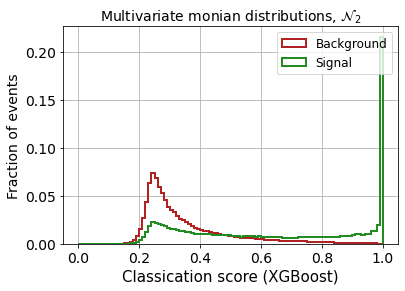

Classification score (10ML):


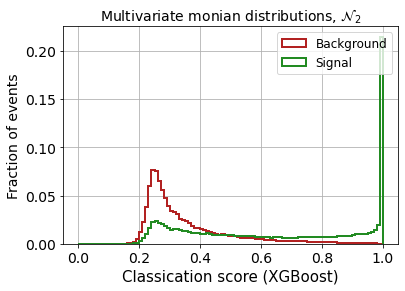

In [15]:
# XGBoost with the kinematic variables of the leptons

########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM_1ML = []
pred_XG_NP_1ML = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM_1ML.append(y_pred_xg_1ML[i])
    else:
        pred_XG_NP_1ML.append(y_pred_xg_1ML[i])
        
        
print('Classification score (1ML):')
        
weights = np.ones_like(pred_XG_SM_1ML)/float(len(pred_XG_SM_1ML))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM_1ML, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP_1ML)/float(len(pred_XG_NP_1ML))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP_1ML, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()




# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score (10ML):')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()


## METHODS

### 0. Ensembles characteristics

In [16]:
##############
# PARAMETERS #
##############

# requested number of ensembles
n_ensembles = 5000

# number of expected background events per ensemble
B_expected = 5000

# ratio S_expected/B_expected (signal ratio)
SB_ratio = [0.0006, 0.001, 0.0016, 0.0025, 0.005, 0.0075, 0.01, 0.025]





# SOME USEFUL DERIVATED PARAMETERS:

# S_expected:
S_expected = [ int(SB_ratio[iii]*B_expected) for iii in range(len(SB_ratio)) ]
print(S_expected)

# S/\sqrt{B}
SsqrtB = [ S_expected[iii]/(B_expected)**0.5 for iii in range(len(SB_ratio)) ]


ntrials = 5000

[2, 5, 8, 12, 25, 37, 50, 125]


### 0. BINNING WITH CROSS-VALIDATION

### Numbers of bins

 BINNING 


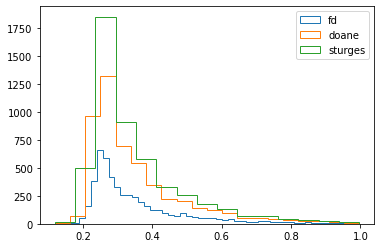

fd 51
doane 20
sturges 15
 


In [17]:
print(' BINNING ')

divs_B = int(len(pred_XG_SM)/B_expected)

B_1 = []
B_2 = []
B_3 = []

for it in range(divs_B):
    datB_grid_SM = pred_XG_SM[(B_expected*it):(B_expected*(it+1))]
    datB_grid_NP = pred_XG_NP[:B_expected]

    B_hist1 = np.histogram_bin_edges(datB_grid_SM, bins = 'fd')
    B_hist2 = np.histogram_bin_edges(datB_grid_SM, bins = 'doane')
    B_hist3 = np.histogram_bin_edges(datB_grid_SM, bins = 'sturges')

    B_1.append(len(B_hist1))
    B_2.append(len(B_hist2))
    B_3.append(len(B_hist3))



B_1_mean = int(np.mean(B_1))
B_2_mean = int(np.mean(B_2))
B_3_mean = int(np.mean(B_3))


B_hist1 = plt.hist(datB_grid_SM, bins = B_1_mean, histtype = 'step', label = 'fd')
B_hist2 = plt.hist(datB_grid_SM, bins = B_2_mean, histtype = 'step', label = 'doane')
B_hist3 = plt.hist(datB_grid_SM, bins = B_3_mean, histtype = 'step', label = 'sturges')
plt.legend()
plt.show()


print('fd', B_1_mean)
print('doane', B_2_mean)
print('sturges', B_3_mean)
print(' ')

B_bins_mean = [B_1_mean, B_2_mean, B_3_mean]

### Binning with cross-validation - equal size bins

In [18]:
# eq size with cross-val method to determine Nbin
Z_bins_XG_CV0 = []
Z_bins_XG_CV1 = []
Z_bins_XG_CV2 = []

Z_bins_XG_CV0_zeros = []
Z_bins_XG_CV1_zeros = []
Z_bins_XG_CV2_zeros = []



for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    
    
    
    
    ###############################
    # EQ SIZE CROSS-VAL FOR Nbins #
    ###############################


    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]

    Z_bins_XG_CV = []
    Z_bins_XG_CV_zeros = []

    for j_it in range(len(B_bins_mean)):

        # bin the parameter space of all background events
        hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(B_bins_mean[j_it]), range = [[min(pred_XG_SM),max(pred_XG_SM)]])
        bin_edges = binedges_back[0]

        if min(hist_back) >= 5*N_ensembles_back:
            print('ok j_it=', j_it)

            # now divide by the number of possible ensembles
            back_prom = hist_back/N_ensembles_back

            # same for signal
            hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges])
            sig_prom = hist_sig/N_ensembles_sig

            # then the signif Z^binned-Asimov:
            Z_bins_XG_CV_aux = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

        else:
            print('NO ok j_it=', j_it)
            Z_bins_XG_CV_aux = 0

        Z_bins_XG_CV.append(Z_bins_XG_CV_aux)


        # REPLACE the zeros
        hist_back_noceros = []
        for i in range(len(hist_back)):
            if hist_back[i]!=0:
                hist_back_noceros.append(hist_back[i])

        min_back = min(hist_back_noceros)

        # replace the zeros
        for i in range(len(hist_back)):
            if hist_back[i]==0:
                hist_back[i] = min_back

        # now divide by the number of possible ensembles
        back_prom = hist_back/N_ensembles_back

        # same for signal
        hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges])
        sig_prom = hist_sig/N_ensembles_sig

        Z_bins_XG_CV_zeros.append( ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5 )


    Z_bins_XG_CV0.append(Z_bins_XG_CV[0])
    Z_bins_XG_CV1.append(Z_bins_XG_CV[1])
    Z_bins_XG_CV2.append(Z_bins_XG_CV[2])

    Z_bins_XG_CV0_zeros.append(Z_bins_XG_CV_zeros[0])
    Z_bins_XG_CV1_zeros.append(Z_bins_XG_CV_zeros[1])
    Z_bins_XG_CV2_zeros.append(Z_bins_XG_CV_zeros[2])

    print(' ')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
NO ok j_it= 0
NO ok j_it= 1
NO ok j_it= 2
 
B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
NO ok j_it= 0
NO ok j_it= 1
NO ok j_it= 2
 
B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
NO ok j_it= 0
NO ok j_it= 1
NO ok j_it= 2
 
B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
NO ok j_it= 0
NO ok j_it= 1
NO ok j_it= 2
 
B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
NO ok j_it= 0
NO ok j_it= 1
NO ok j_it= 2
 
B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
NO ok j_it= 0
NO ok j_it= 1
NO ok j_it= 2
 
B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
NO ok j_it= 0
NO ok j_it= 1
NO ok j_it= 2
 
B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
NO ok j_it= 0
NO ok j_it= 1
NO ok j_it= 2
 


In [19]:
print(Z_bins_XG_CV0)
print(Z_bins_XG_CV1)
print(Z_bins_XG_CV2)

print(Z_bins_XG_CV0_zeros)
print(Z_bins_XG_CV1_zeros)
print(Z_bins_XG_CV2_zeros)

[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.2856023938598887, 0.6590431753474961, 0.9865063120248022, 1.3735095994819886, 2.397952891213866, 3.163939861683023, 3.8830818543710213, 7.024447132674117]
[0.17009347519691778, 0.41451940237744345, 0.6475750318572269, 0.9429754351247546, 1.8081738535923684, 2.5120356761536446, 3.20174813478595, 6.364524171865793]
[0.14647096830335707, 0.3597120798790281, 0.5658418764423812, 0.8307029463930728, 1.6259653513942682, 2.2899597813968384, 2.951686157415058, 6.06702553026997]


In [ ]:
Z_bins_XG_CV0 = 
Z_bins_XG_CV1 = 
Z_bins_XG_CV2 = 

Z_bins_XG_CV0_zeros = 
Z_bins_XG_CV1_zeros = 
Z_bins_XG_CV2_zeros = 

<ipython-input-20-b6791d54c268>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV0, '-ok', color='blue', lw=lw, label='o(x) BL fd')
<ipython-input-20-b6791d54c268>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV1, '--ok', color='green', lw=lw, label='o(x) BL doane')
<ipython-input-20-b6791d54c268>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV2, ':ok', color='red', lw=lw, label='o(x) BL sturges')
<ipython-input-20-b6791d54c268>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argum

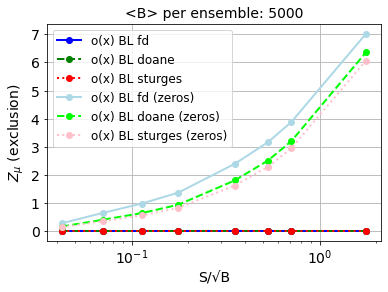

In [20]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV0, '-ok', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV1, '--ok', color='green', lw=lw, label='o(x) BL doane')  
plt.plot(posX, Z_bins_XG_CV2, ':ok', color='red', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV0_zeros, '-ok', color='lightblue', lw=lw, label='o(x) BL fd (zeros)') 
plt.plot(posX, Z_bins_XG_CV1_zeros, '--ok', color='lime', lw=lw, label='o(x) BL doane (zeros)') 
plt.plot(posX, Z_bins_XG_CV2_zeros, ':ok', color='pink', lw=lw, label='o(x) BL sturges (zeros)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Binning with cross-validation - non-equal size bins

In [21]:
########################################################################
# RANDOM BINNING with CROSS-VAL FOR Nbins and CROSS-VAL for the random #
########################################################################

num_SM = int(len(pred_XG_SM)/6)
num_NP = int(len(pred_XG_NP)/6)

numdat = min(num_SM, num_NP)

data_grid_SM_0 = pred_XG_SM[(0*numdat):(1*numdat)]
data_grid_NP_0 = pred_XG_NP[(0*numdat):(1*numdat)]

data_grid_SM_1 = pred_XG_SM[(1*numdat):(2*numdat)]
data_grid_NP_1 = pred_XG_NP[(1*numdat):(2*numdat)]

data_grid_SM_2 = pred_XG_SM[(2*numdat):(3*numdat)]
data_grid_NP_2 = pred_XG_NP[(2*numdat):(3*numdat)]

data_grid_SM_3 = pred_XG_SM[(3*numdat):(4*numdat)]
data_grid_NP_3 = pred_XG_NP[(3*numdat):(4*numdat)]

data_grid_SM_4 = pred_XG_SM[(4*numdat):(5*numdat)]
data_grid_NP_4 = pred_XG_NP[(4*numdat):(5*numdat)]

data_grid_SM_5 = pred_XG_SM[(5*numdat):(6*numdat)]
data_grid_NP_5 = pred_XG_NP[(5*numdat):(6*numdat)]



# cross-val method to determine the random binning
CV0_chi2 = []
CV1_chi2 = []
CV2_chi2 = []

CV0_chi2_N = []
CV1_chi2_N = []
CV2_chi2_N = []

CV0_MSE = []
CV1_MSE = []
CV2_MSE = []

CV0_poiss = []
CV1_poiss = []
CV2_poiss = []


CV0_chi2_eqsize = []
CV1_chi2_eqsize = []
CV2_chi2_eqsize = []

CV0_chi2_N_eqsize = []
CV1_chi2_N_eqsize = []
CV2_chi2_N_eqsize = []

CV0_MSE_eqsize = []
CV1_MSE_eqsize = []
CV2_MSE_eqsize = []

CV0_poiss_eqsize = []
CV1_poiss_eqsize = []
CV2_poiss_eqsize = []


# random with cross-val method to determine Nbin and cross-val method to determine the random binning
Z_bins_XG_CV0_chi2 = []
Z_bins_XG_CV1_chi2 = []
Z_bins_XG_CV2_chi2 = []

Z_bins_XG_CV0_chi2_N = []
Z_bins_XG_CV1_chi2_N = []
Z_bins_XG_CV2_chi2_N = []

Z_bins_XG_CV0_MSE = []
Z_bins_XG_CV1_MSE = []
Z_bins_XG_CV2_MSE = []

Z_bins_XG_CV0_poiss = []
Z_bins_XG_CV1_poiss = []
Z_bins_XG_CV2_poiss = []


# THE SAME but replacin the zeros in the binning

# cross-val method to determine the random binning
CV0_chi2_zeros = []
CV1_chi2_zeros = []
CV2_chi2_zeros = []

CV0_chi2_N_zeros = []
CV1_chi2_N_zeros = []
CV2_chi2_N_zeros = []

CV0_MSE_zeros = []
CV1_MSE_zeros = []
CV2_MSE_zeros = []

CV0_poiss_zeros = []
CV1_poiss_zeros = []
CV2_poiss_zeros = []


CV0_chi2_eqsize_zeros = []
CV1_chi2_eqsize_zeros = []
CV2_chi2_eqsize_zeros = []

CV0_chi2_N_eqsize_zeros = []
CV1_chi2_N_eqsize_zeros = []
CV2_chi2_N_eqsize_zeros = []

CV0_MSE_eqsize_zeros = []
CV1_MSE_eqsize_zeros = []
CV2_MSE_eqsize_zeros = []

CV0_poiss_eqsize_zeros = []
CV1_poiss_eqsize_zeros = []
CV2_poiss_eqsize_zeros = []


# random with cross-val method to determine Nbin and cross-val method to determine the random binning
Z_bins_XG_CV0_chi2_zeros = []
Z_bins_XG_CV1_chi2_zeros = []
Z_bins_XG_CV2_chi2_zeros = []

Z_bins_XG_CV0_chi2_N_zeros = []
Z_bins_XG_CV1_chi2_N_zeros = []
Z_bins_XG_CV2_chi2_N_zeros = []

Z_bins_XG_CV0_MSE_zeros = []
Z_bins_XG_CV1_MSE_zeros = []
Z_bins_XG_CV2_MSE_zeros = []

Z_bins_XG_CV0_poiss_zeros = []
Z_bins_XG_CV1_poiss_zeros = []
Z_bins_XG_CV2_poiss_zeros = []




for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    Z_bins_XG_CV_rd = []

    chi2 = []
    chi2_N = []
    MSE = []
    poiss = []


    Z_bins_XG_CV_rd_zeros = []

    chi2_zeros = []
    chi2_N_zeros = []
    MSE_zeros = []
    poiss_zeros = []


    # Les't find the number of possible ensembles
    N_ensembles_back = len(data_grid_SM_0) / B_expected
    N_ensembles_sig = len(data_grid_NP_0) / S_expected[iii]



    for j_it in range(len(B_bins_mean)):

        print('doing Nbin: ', B_bins_mean[j_it])

        for i_it in range(ntrials):

            if i_it == 0:
                # bin the parameter space of all background events
                bin_edges = np.linspace( min(pred_XG_SM), max(pred_XG_SM), (B_bins_mean[j_it]+1) )

            else:
                bin_edges = np.hstack( (min(pred_XG_SM), np.sort( np.random.uniform(min(pred_XG_SM), max(pred_XG_SM), (B_bins_mean[j_it]-1)) ), max(pred_XG_SM) ) )

            hist_SM_0, _ = np.histogramdd([data_grid_SM_0], bins = [bin_edges])
            hist_SM_1, _ = np.histogramdd([data_grid_SM_1], bins = [bin_edges])
            hist_SM_2, _ = np.histogramdd([data_grid_SM_2], bins = [bin_edges])
            hist_SM_3, _ = np.histogramdd([data_grid_SM_3], bins = [bin_edges])

            mean = (hist_SM_0 + hist_SM_1 + hist_SM_2 + hist_SM_3 )/4

            if min(mean)>= 5*N_ensembles_back:

                ##################
                # COMPUTE METRIC #
                ##################
                hist_SM_4, _ = np.histogramdd([data_grid_SM_4], bins = [bin_edges])

                aux_chi2 = sum( ((hist_SM_4 - mean))**2 / mean )
                aux_chi2_N = aux_chi2 / j_it
                aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it
                aux_poiss = sum( mean - (hist_SM_4*np.log(mean)) + (hist_SM_4*np.log(hist_SM_4)) - hist_SM_4 )


                #############
                # COMPUTE Z #
                #############
                # bin the parameter space of all background events
                hist_SM_5, _ = np.histogramdd([data_grid_SM_5], bins = [bin_edges])

                # now divide by the number of possible ensembles
                back_prom_5 = hist_SM_5/N_ensembles_back

                # same for signal
                hist_NP_5, _ = np.histogramdd([data_grid_NP_5], bins = [bin_edges])

                sig_prom_5 = hist_NP_5/N_ensembles_sig

                # then the signif Z^binned-Asimov:
                Z_bins_XG_aux = ( 2* sum( ( back_prom_5 * np.log( back_prom_5 / (sig_prom_5+back_prom_5) ) ) + sig_prom_5 ) )**0.5


            else:
                Z_bins_XG_aux = 0
                aux_chi2 = 9999
                aux_chi2_N = 9999
                aux_MSE = 9999
                aux_poiss = 9999

            Z_bins_XG_CV_rd.append(Z_bins_XG_aux)
            chi2.append(aux_chi2)
            chi2_N.append(aux_chi2_N)
            MSE.append(aux_MSE)
            poiss.append(aux_poiss)



            # REPLACE the zeros
            mean_noceros = []
            for i in range(len(mean)):
                if mean[i]!=0:
                    mean_noceros.append(mean[i])

            min_mean = min(mean_noceros)

            # replace the zeros
            for i in range(len(mean)):
                if mean[i]==0:
                    mean[i] = min_mean


            ##################
            # COMPUTE METRIC #
            ##################
            hist_SM_4, _ = np.histogramdd([data_grid_SM_4], bins = [bin_edges])

            hist_back_noceros = []
            for i in range(len(hist_SM_4)):
                if hist_SM_4[i]!=0:
                    hist_back_noceros.append(hist_SM_4[i])

            min_back = min(hist_back_noceros)

            # replace the zeros
            for i in range(len(hist_SM_4)):
                if hist_SM_4[i]==0:
                    hist_SM_4[i] = min_back

            aux_chi2 = sum( ((hist_SM_4 - mean))**2 / mean )
            aux_chi2_N = aux_chi2 / j_it
            aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it
            aux_poiss = sum( mean - (hist_SM_4*np.log(mean)) + (hist_SM_4*np.log(hist_SM_4)) - hist_SM_4 )


            #############
            # COMPUTE Z #
            #############
            # bin the parameter space of all background events
            hist_SM_5, _ = np.histogramdd([data_grid_SM_5], bins = [bin_edges])

            hist_back_noceros = []
            for i in range(len(hist_SM_5)):
                if hist_SM_5[i]!=0:
                    hist_back_noceros.append(hist_SM_5[i])

            min_back = min(hist_back_noceros)

            # replace the zeros
            for i in range(len(hist_SM_5)):
                if hist_SM_5[i]==0:
                    hist_SM_5[i] = min_back

            # now divide by the number of possible ensembles
            back_prom_5 = hist_SM_5/N_ensembles_back

            # same for signal
            hist_NP_5, _ = np.histogramdd([data_grid_NP_5], bins = [bin_edges])

            sig_prom_5 = hist_NP_5/N_ensembles_sig

            # then the signif Z^binned-Asimov:
            Z_bins_XG_aux = ( 2* sum( ( back_prom_5 * np.log( back_prom_5 / (sig_prom_5+back_prom_5) ) ) + sig_prom_5 ) )**0.5


            Z_bins_XG_CV_rd_zeros.append(Z_bins_XG_aux)
            chi2_zeros.append(aux_chi2)
            chi2_N_zeros.append(aux_chi2_N)
            MSE_zeros.append(aux_MSE)
            poiss_zeros.append(aux_poiss)




    ################################################
    # SELECT THE BINNING with MINIMUM METRIC VALUE #
    ################################################

    # the value of the metric
    chi2_per_bin = []
    chi2_N_per_bin = []
    MSE_per_bin = []
    poiss_per_bin = []

    chi2_per_bin_eqsize = []
    chi2_N_per_bin_eqsize = []
    MSE_per_bin_eqsize = []
    poiss_per_bin_eqsize = []

    for i in range(len(B_bins_mean)):
        chi2_per_bin.append( np.min(chi2[ntrials*i:ntrials*(i+1)]) )
        chi2_N_per_bin.append( np.min(chi2_N[ntrials*i:ntrials*(i+1)]) )
        MSE_per_bin.append( np.min(MSE[ntrials*i:ntrials*(i+1)]) )
        poiss_per_bin.append( np.min(poiss[ntrials*i:ntrials*(i+1)]) )

        chi2_per_bin_eqsize.append( chi2[ntrials*i] )
        chi2_N_per_bin_eqsize.append( chi2_N[ntrials*i] )
        MSE_per_bin_eqsize.append( MSE[ntrials*i] )
        poiss_per_bin_eqsize.append( poiss[ntrials*i] )


    CV0_chi2.append(chi2_per_bin[0])
    CV1_chi2.append(chi2_per_bin[1])
    CV2_chi2.append(chi2_per_bin[2])

    CV0_chi2_N.append(chi2_N_per_bin[0])
    CV1_chi2_N.append(chi2_N_per_bin[1])
    CV2_chi2_N.append(chi2_N_per_bin[2])

    CV0_MSE.append(MSE_per_bin[0])
    CV1_MSE.append(MSE_per_bin[1])
    CV2_MSE.append(MSE_per_bin[2])

    CV0_poiss.append(poiss_per_bin[0])
    CV1_poiss.append(poiss_per_bin[1])
    CV2_poiss.append(poiss_per_bin[2])



    CV0_chi2_eqsize.append(chi2_per_bin_eqsize[0])
    CV1_chi2_eqsize.append(chi2_per_bin_eqsize[1])
    CV2_chi2_eqsize.append(chi2_per_bin_eqsize[2])

    CV0_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[0])
    CV1_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[1])
    CV2_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[2])

    CV0_MSE_eqsize.append(MSE_per_bin_eqsize[0])
    CV1_MSE_eqsize.append(MSE_per_bin_eqsize[1])
    CV2_MSE_eqsize.append(MSE_per_bin_eqsize[2])

    CV0_poiss_eqsize.append(poiss_per_bin_eqsize[0])
    CV1_poiss_eqsize.append(poiss_per_bin_eqsize[1])
    CV2_poiss_eqsize.append(poiss_per_bin_eqsize[2])




    # Z for the minimum of the metric
    Z_chi2_per_bin = []
    Z_chi2_N_per_bin = []
    Z_MSE_per_bin = []
    Z_poiss_per_bin = []

    for i in range(len(B_bins_mean)):
        Z_chi2_per_bin.append( Z_bins_XG_CV_rd[np.argmin(chi2[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_chi2_N_per_bin.append( Z_bins_XG_CV_rd[np.argmin(chi2_N[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_MSE_per_bin.append( Z_bins_XG_CV_rd[np.argmin(MSE[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_poiss_per_bin.append( Z_bins_XG_CV_rd[np.argmin(poiss[ntrials*i:ntrials*(i+1)]) + ntrials*i] )   



    Z_bins_XG_CV0_chi2.append(Z_chi2_per_bin[0])
    Z_bins_XG_CV1_chi2.append(Z_chi2_per_bin[1])
    Z_bins_XG_CV2_chi2.append(Z_chi2_per_bin[2])

    Z_bins_XG_CV0_chi2_N.append(Z_chi2_N_per_bin[0])
    Z_bins_XG_CV1_chi2_N.append(Z_chi2_N_per_bin[1])
    Z_bins_XG_CV2_chi2_N.append(Z_chi2_N_per_bin[2])

    Z_bins_XG_CV0_MSE.append(Z_MSE_per_bin[0])
    Z_bins_XG_CV1_MSE.append(Z_MSE_per_bin[1])
    Z_bins_XG_CV2_MSE.append(Z_MSE_per_bin[2])

    Z_bins_XG_CV0_poiss.append(Z_poiss_per_bin[0])
    Z_bins_XG_CV1_poiss.append(Z_poiss_per_bin[1])
    Z_bins_XG_CV2_poiss.append(Z_poiss_per_bin[2])




    # SAME for replacing the zeros in the binning
    # the value of the metric
    chi2_per_bin_zeros = []
    chi2_N_per_bin_zeros = []
    MSE_per_bin_zeros = []
    poiss_per_bin_zeros = []

    chi2_per_bin_eqsize_zeros = []
    chi2_N_per_bin_eqsize_zeros = []
    MSE_per_bin_eqsize_zeros = []
    poiss_per_bin_eqsize_zeros = []

    for i in range(len(B_bins_mean)):
        chi2_per_bin_zeros.append( np.min(chi2_zeros[ntrials*i:ntrials*(i+1)]) )
        chi2_N_per_bin_zeros.append( np.min(chi2_N_zeros[ntrials*i:ntrials*(i+1)]) )
        MSE_per_bin_zeros.append( np.min(MSE_zeros[ntrials*i:ntrials*(i+1)]) )
        poiss_per_bin_zeros.append( np.min(poiss_zeros[ntrials*i:ntrials*(i+1)]) )

        chi2_per_bin_eqsize_zeros.append( chi2_zeros[ntrials*i] )
        chi2_N_per_bin_eqsize_zeros.append( chi2_N_zeros[ntrials*i] )
        MSE_per_bin_eqsize_zeros.append( MSE_zeros[ntrials*i] )
        poiss_per_bin_eqsize_zeros.append( poiss_zeros[ntrials*i] )


    CV0_chi2_zeros.append(chi2_per_bin_zeros[0])
    CV1_chi2_zeros.append(chi2_per_bin_zeros[1])
    CV2_chi2_zeros.append(chi2_per_bin_zeros[2])

    CV0_chi2_N_zeros.append(chi2_N_per_bin_zeros[0])
    CV1_chi2_N_zeros.append(chi2_N_per_bin_zeros[1])
    CV2_chi2_N_zeros.append(chi2_N_per_bin_zeros[2])

    CV0_MSE_zeros.append(MSE_per_bin_zeros[0])
    CV1_MSE_zeros.append(MSE_per_bin_zeros[1])
    CV2_MSE_zeros.append(MSE_per_bin_zeros[2])

    CV0_poiss_zeros.append(poiss_per_bin_zeros[0])
    CV1_poiss_zeros.append(poiss_per_bin_zeros[1])
    CV2_poiss_zeros.append(poiss_per_bin_zeros[2])



    CV0_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[0])
    CV1_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[1])
    CV2_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[2])

    CV0_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[0])
    CV1_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[1])
    CV2_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[2])

    CV0_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[0])
    CV1_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[1])
    CV2_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[2])

    CV0_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[0])
    CV1_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[1])
    CV2_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[2])




    # Z for the minimum of the metric
    Z_chi2_per_bin_zeros = []
    Z_chi2_N_per_bin_zeros = []
    Z_MSE_per_bin_zeros = []
    Z_poiss_per_bin_zeros = []

    for i in range(len(B_bins_mean)):
        Z_chi2_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(chi2_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_chi2_N_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(chi2_N_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_MSE_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(MSE_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_poiss_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(poiss_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )   



    Z_bins_XG_CV0_chi2_zeros.append(Z_chi2_per_bin_zeros[0])
    Z_bins_XG_CV1_chi2_zeros.append(Z_chi2_per_bin_zeros[1])
    Z_bins_XG_CV2_chi2_zeros.append(Z_chi2_per_bin_zeros[2])

    Z_bins_XG_CV0_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[0])
    Z_bins_XG_CV1_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[1])
    Z_bins_XG_CV2_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[2])

    Z_bins_XG_CV0_MSE_zeros.append(Z_MSE_per_bin_zeros[0])
    Z_bins_XG_CV1_MSE_zeros.append(Z_MSE_per_bin_zeros[1])
    Z_bins_XG_CV2_MSE_zeros.append(Z_MSE_per_bin_zeros[2])

    Z_bins_XG_CV0_poiss_zeros.append(Z_poiss_per_bin_zeros[0])
    Z_bins_XG_CV1_poiss_zeros.append(Z_poiss_per_bin_zeros[1])
    Z_bins_XG_CV2_poiss_zeros.append(Z_poiss_per_bin_zeros[2])
    
    print(' ')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
doing Nbin:  51


<ipython-input-21-31abcaeaab5c>:266: RuntimeWarning: divide by zero encountered in double_scalars
  aux_chi2_N = aux_chi2 / j_it
<ipython-input-21-31abcaeaab5c>:267: RuntimeWarning: divide by zero encountered in double_scalars
  aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it


doing Nbin:  20
doing Nbin:  15
 
B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
doing Nbin:  51
doing Nbin:  20
doing Nbin:  15
 
B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
doing Nbin:  51
doing Nbin:  20
doing Nbin:  15
 
B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
doing Nbin:  51
doing Nbin:  20
doing Nbin:  15
 
B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
doing Nbin:  51
doing Nbin:  20
doing Nbin:  15
 
B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
doing Nbin:  51
doing Nbin:  20
doing Nbin:  15
 
B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
doing Nbin:  51
doing Nbin:  20
doing Nbin:  15
 
B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
doing Nbin:  51
doing Nbin:  20
doing Nbin:  15
 


In [22]:
print(Z_bins_XG_CV0_chi2)
print(Z_bins_XG_CV1_chi2)
print(Z_bins_XG_CV2_chi2)

print(Z_bins_XG_CV0_chi2_N)
print(Z_bins_XG_CV1_chi2_N)
print(Z_bins_XG_CV2_chi2_N)

print(Z_bins_XG_CV0_MSE)
print(Z_bins_XG_CV1_MSE)
print(Z_bins_XG_CV2_MSE)

print(Z_bins_XG_CV0_poiss)
print(Z_bins_XG_CV1_poiss)
print(Z_bins_XG_CV2_poiss)



print(Z_bins_XG_CV0_chi2_zeros)
print(Z_bins_XG_CV1_chi2_zeros)
print(Z_bins_XG_CV2_chi2_zeros)

print(Z_bins_XG_CV0_chi2_N_zeros)
print(Z_bins_XG_CV1_chi2_N_zeros)
print(Z_bins_XG_CV2_chi2_N_zeros)

print(Z_bins_XG_CV0_MSE_zeros)
print(Z_bins_XG_CV1_MSE_zeros)
print(Z_bins_XG_CV2_MSE_zeros)

print(Z_bins_XG_CV0_poiss_zeros)
print(Z_bins_XG_CV1_poiss_zeros)
print(Z_bins_XG_CV2_poiss_zeros)

[0, 0, 0, 0, 0, 0, 0, 0]
[0.16094873670073576, 0.3157028963670888, 0.5721261659152023, 0.6435473926500952, 1.441913894021175, 2.1739927854980063, 2.5094884201774605, 6.418915118603943]
[0.12787477317937093, 0.35612758650140974, 0.44621111520953427, 0.9270136591181108, 1.3006143115990225, 2.5892328938884956, 2.134965833961099, 5.732120000250674]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.16094873670073576, 0.3157028963670888, 0.5721261659152023, 0.6435473926500952, 1.441913894021175, 2.1739927854980063, 2.5094884201774605, 6.418915118603943]
[0.12787477317937093, 0.35612758650140974, 0.44621111520953427, 0.9270136591181108, 1.3006143115990225, 2.5892328938884956, 2.134965833961099, 5.732120000250674]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.16957636232485276, 0, 0.5721261659152023, 0.7783526743495087, 1.7500229041389952, 0, 2.5094884201774605, 5.2528130833219855]
[0.1713733145378648, 0.30378872311411115, 0.5818985741302614, 0.7371169471318529, 1.3006143115990225, 2.5690539250383915, 2.7791696783317814, 6.264812248

In [ ]:
Z_bins_XG_CV0_chi2 = 
Z_bins_XG_CV1_chi2 = 
Z_bins_XG_CV2_chi2 = 

Z_bins_XG_CV0_chi2_N = 
Z_bins_XG_CV1_chi2_N = 
Z_bins_XG_CV2_chi2_N = 

Z_bins_XG_CV0_MSE = 
Z_bins_XG_CV1_MSE = 
Z_bins_XG_CV2_MSE = 

Z_bins_XG_CV0_poiss = 
Z_bins_XG_CV1_poiss = 
Z_bins_XG_CV2_poiss = 



Z_bins_XG_CV0_chi2_zeros = 
Z_bins_XG_CV1_chi2_zeros = 
Z_bins_XG_CV2_chi2_zeros = 

Z_bins_XG_CV0_chi2_N_zeros = 
Z_bins_XG_CV1_chi2_N_zeros = 
Z_bins_XG_CV2_chi2_N_zeros = 

Z_bins_XG_CV0_MSE_zeros = 
Z_bins_XG_CV1_MSE_zeros = 
Z_bins_XG_CV2_MSE_zeros = 

Z_bins_XG_CV0_poiss_zeros = 
Z_bins_XG_CV1_poiss_zeros = 
Z_bins_XG_CV2_poiss_zeros = 

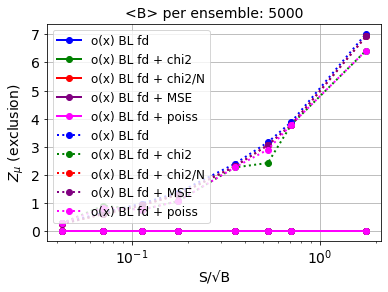

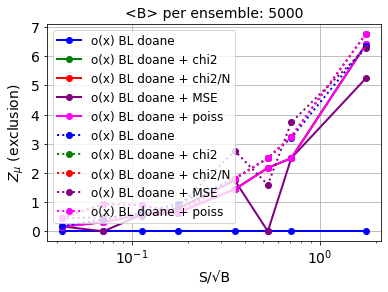

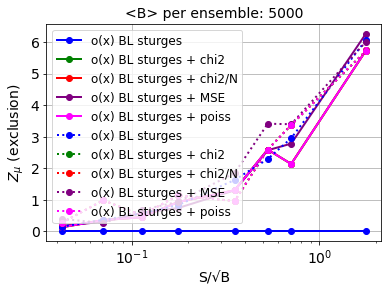

In [23]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV0, '-o', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV0_chi2, '-o', color='green', lw=lw, label='o(x) BL fd + chi2')  
plt.plot(posX, Z_bins_XG_CV0_chi2_N, '-o', color='red', lw=lw, label='o(x) BL fd + chi2/N') 
plt.plot(posX, Z_bins_XG_CV0_MSE, '-o', color='purple', lw=lw, label='o(x) BL fd + MSE') 
plt.plot(posX, Z_bins_XG_CV0_poiss, '-o', color='magenta', lw=lw, label='o(x) BL fd + poiss') 
plt.plot(posX, Z_bins_XG_CV0_zeros, ':o', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV0_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL fd + chi2')  
plt.plot(posX, Z_bins_XG_CV0_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL fd + chi2/N') 
plt.plot(posX, Z_bins_XG_CV0_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL fd + MSE') 
plt.plot(posX, Z_bins_XG_CV0_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL fd + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()





plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV1, '-o', color='blue', lw=lw, label='o(x) BL doane') 
plt.plot(posX, Z_bins_XG_CV1_chi2, '-o', color='green', lw=lw, label='o(x) BL doane + chi2')  
plt.plot(posX, Z_bins_XG_CV1_chi2_N, '-o', color='red', lw=lw, label='o(x) BL doane + chi2/N') 
plt.plot(posX, Z_bins_XG_CV1_MSE, '-o', color='purple', lw=lw, label='o(x) BL doane + MSE') 
plt.plot(posX, Z_bins_XG_CV1_poiss, '-o', color='magenta', lw=lw, label='o(x) BL doane + poiss') 
plt.plot(posX, Z_bins_XG_CV1_zeros, ':o', color='blue', lw=lw, label='o(x) BL doane') 
plt.plot(posX, Z_bins_XG_CV1_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL doane + chi2')  
plt.plot(posX, Z_bins_XG_CV1_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL doane + chi2/N') 
plt.plot(posX, Z_bins_XG_CV1_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL doane + MSE') 
plt.plot(posX, Z_bins_XG_CV1_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL doane + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV2, '-o', color='blue', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV2_chi2, '-o', color='green', lw=lw, label='o(x) BL sturges + chi2')  
plt.plot(posX, Z_bins_XG_CV2_chi2_N, '-o', color='red', lw=lw, label='o(x) BL sturges + chi2/N') 
plt.plot(posX, Z_bins_XG_CV2_MSE, '-o', color='purple', lw=lw, label='o(x) BL sturges + MSE') 
plt.plot(posX, Z_bins_XG_CV2_poiss, '-o', color='magenta', lw=lw, label='o(x) BL sturges + poiss') 
plt.plot(posX, Z_bins_XG_CV2_zeros, ':o', color='blue', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV2_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL sturges + chi2')  
plt.plot(posX, Z_bins_XG_CV2_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL sturges + chi2/N') 
plt.plot(posX, Z_bins_XG_CV2_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL sturges + MSE') 
plt.plot(posX, Z_bins_XG_CV2_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL sturges + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 1. BIN LOG LIKELIHOOD

In [17]:
# 1st variable: invariant mass
background_X_1 = invariant_mass_eeSM
signal_X_1 = invariant_mass_eeSSMZprime

N_B = len(background_X_1)
N_S = len(signal_X_1)

# bins
logbins = [2000.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000.0]

In [18]:
#################################
# BINNED POISSON LOG-LIKELIHOOD #
#################################


store_Z_bins = []
store_Z_bins_logbins = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't use an integer number of possible ensembles
    N_ensembles_back = int(N_B / B_expected)
    N_events_back = N_ensembles_back * B_expected

    N_ensembles_sig = int(N_S / S_expected[iii])
    N_events_sig = N_ensembles_sig * S_expected[iii]


    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=(100), range = [[2000,20000]])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=(100), range = [[2000,20000]])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins.append(Z_bins)

    print('Z_bins : ', Z_bins)
    

    
    ############
    # LOG BINS #
    ############
    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=[logbins])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=[logbins])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins_logbins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_logbins.append(Z_bins_logbins)

    print('Z_bins_logbins : ', Z_bins_logbins)
    
    
    
    print('\n ----------------------------------- \n')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins :  0.6581402704813594
Z_bins_logbins :  0.6144269716610209

 ----------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins :  1.1852379476051504
Z_bins_logbins :  1.1466648140518596

 ----------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins :  1.5753256956975197
Z_bins_logbins :  1.541034042076445

 ----------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
Z_bins :  2.001099367346406
Z_bins_logbins :  1.9702938288310958

 ----------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
Z_bins :  3.0581597011756054
Z_bins_logbins :  3.0317093650142297

 ----------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
Z_bins :  3.8268681997270306
Z_bins_logbins :  3.801340535230817


In [19]:
print(store_Z_bins)
print(store_Z_bins_logbins)

[0.6581402704813594, 1.1852379476051504, 1.5753256956975197, 2.001099367346406, 3.0581597011756054, 3.8268681997270306, 4.54524138355261, 7.697185975085183]
[0.6144269716610209, 1.1466648140518596, 1.541034042076445, 1.9702938288310958, 3.0317093650142297, 3.801340535230817, 4.519656906024243, 7.666526704311474]


In [24]:
store_Z_bins = [0.6581402704813594, 1.1852379476051504, 1.5753256956975197, 2.001099367346406, 3.0581597011756054, 3.8268681997270306, 4.54524138355261, 7.697185975085183]

store_Z_bins_logbins = [0.6144269716610209, 1.1466648140518596, 1.541034042076445, 1.9702938288310958, 3.0317093650142297, 3.801340535230817, 4.519656906024243, 7.666526704311474]

<ipython-input-6-3340ebf10fa5>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-6-3340ebf10fa5>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')


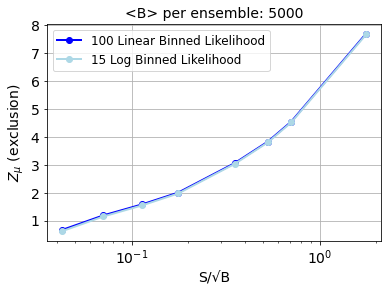

In [6]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 2. Binned OUTPUT and MLL Asimov

In [21]:
#################################
# MLL Asimov-like #
#################################


store_Z_bins_XG = []

store_Z_bins_XG_15bins = []
store_Z_bins_XG_15bins_1ML = []

store_Z_bins_XG_15bins_eq = []
store_Z_bins_XG_15bins_eq_1ML = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]



    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG.append(Z_bins_XG)

    print('Z_bins_XG : ', Z_bins_XG)
    
    
    
    
    
    ######################
    # linear bins, 10 ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins.append(Z_bins_XG_15bins)

    print('Z_bins_XG_15bins : ', Z_bins_XG_15bins)
    
    
    
    
    
    ######################
    # linear bins, 1  ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_1ML.append(Z_bins_XG_15bins_1ML)

    print('Z_bins_XG_15bins_1ML : ', Z_bins_XG_15bins_1ML)
    
    
    
    
    
    ##########################
    # non linear bins, 10 ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq.append(Z_bins_XG_15bins_eq)

    print('Z_bins_XG_15bins_eq : ', Z_bins_XG_15bins_eq)
    
    
    
    
    
    ##########################
    # non linear bins, 1  ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM_1ML)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP_1ML], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq_1ML.append(Z_bins_XG_15bins_eq_1ML)

    print('Z_bins_XG_15bins_eq_1ML : ', Z_bins_XG_15bins_eq_1ML)


        
    print('\n ----------------------------------------- \n')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins_XG :  0.39602337044911873
Z_bins_XG_15bins :  0.14843536804998894
Z_bins_XG_15bins_1ML :  0.14588561947534717
Z_bins_XG_15bins_eq :  0.05574070076657481
Z_bins_XG_15bins_eq_1ML :  0.05318867536860663

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins_XG :  0.8616902982563316
Z_bins_XG_15bins :  0.3648847113481297
Z_bins_XG_15bins_1ML :  0.35882258121945293
Z_bins_XG_15bins_eq :  0.13916482797176258
Z_bins_XG_15bins_eq_1ML :  0.13280350238511365

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins_XG :  1.2428315233456888
Z_bins_XG_15bins :  0.5744765347153734
Z_bins_XG_15bins_1ML :  0.5652295800199049
Z_bins_XG_15bins_eq :  0.2223661740996192
Z_bins_XG_15bins_eq_1ML :  0.21221781218477673

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}

In [22]:
print(store_Z_bins_XG)

print(store_Z_bins_XG_15bins)
print(store_Z_bins_XG_15bins_1ML)

print(store_Z_bins_XG_15bins_eq)
print(store_Z_bins_XG_15bins_eq_1ML)

[0.39602337044911873, 0.8616902982563316, 1.2428315233456888, 1.6741768501728824, 2.765656804822882, 3.5600200817045544, 4.2988978881847375, 7.505326865629474]
[0.14843536804998894, 0.3648847113481297, 0.5744765347153734, 0.8442558233907417, 1.6569132538341873, 2.3377465658489713, 3.0177324180138245, 6.228221582096941]
[0.14588561947534717, 0.35882258121945293, 0.5652295800199049, 0.8311965438147023, 1.6340385014194623, 2.3082078242712134, 2.98263050583562, 6.175879786891193]
[0.05574070076657481, 0.13916482797176258, 0.2223661740996192, 0.3329576884901712, 0.6897132833371499, 1.015492328606876, 1.364708914228963, 3.309716801283449]
[0.05318867536860663, 0.13280350238511365, 0.21221781218477673, 0.3177941532437836, 0.6585139366870733, 0.9698361081555005, 1.3037487474497942, 3.16695686162257]


In [25]:
store_Z_bins_XG = [0.39602337044911873, 0.8616902982563316, 1.2428315233456888, 1.6741768501728824, 2.765656804822882, 3.5600200817045544, 4.2988978881847375, 7.505326865629474]

store_Z_bins_XG_15bins = [0.14843536804998894, 0.3648847113481297, 0.5744765347153734, 0.8442558233907417, 1.6569132538341873, 2.3377465658489713, 3.0177324180138245, 6.228221582096941]
store_Z_bins_XG_15bins_1ML = [0.14588561947534717, 0.35882258121945293, 0.5652295800199049, 0.8311965438147023, 1.6340385014194623, 2.3082078242712134, 2.98263050583562, 6.175879786891193]

store_Z_bins_XG_15bins_eq = [0.05574070076657481, 0.13916482797176258, 0.2223661740996192, 0.3329576884901712, 0.6897132833371499, 1.015492328606876, 1.364708914228963, 3.309716801283449]
store_Z_bins_XG_15bins_eq_1ML = [0.05318867536860663, 0.13280350238511365, 0.21221781218477673, 0.3177941532437836, 0.6585139366870733, 0.9698361081555005, 1.3037487474497942, 3.16695686162257]

<ipython-input-8-13c05c382495>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-8-13c05c382495>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)')
<ipython-input-8-13c05c382495>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)')
<ipython-input-8-13c05c382495>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the

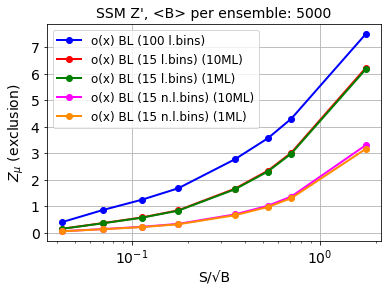

In [8]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



    
    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title("SSM Z', <B> per ensemble: %0.2d" % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 3. MACHINE-LEARNED LIKELIHOOD with KDE

##### For 10 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf  9163.33220626  9168.93293183  9170.62248068
  9165.34196342  9141.783368    9068.82352208  8874.97227934
  8466.54541048  7787.55461181  6808.18035432  5497.93212654
  3797.85600476  1636.9715651  -1092.42181288 -4370.85677317]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.01329487353451575, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf           -inf  5886.99440692
  5316.24605277  4716.40839983  4094.21200706  3441.97355348
  2726.47487338  1933.49513126  1033.9041814     13.48498914
 -1167.22252929 -2477.56214742 -3568.5016034  -5427.72501952]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.01329487353451575, kernel='epanechnikov')


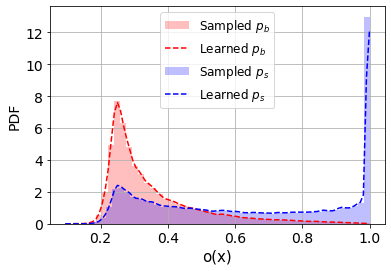


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



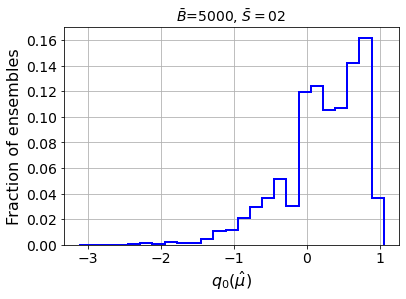

muhat mean:  0.10451775583105695
median q_muhat:  0.3075102006102748
Z_KDE:  0.5545360228247348
Z_KDE mu=0:  0.5545360228247348

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



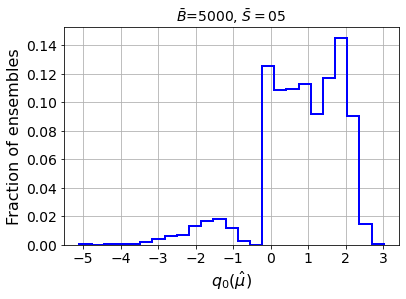

muhat mean:  0.15951229766659658
median q_muhat:  0.956642356211443
Z_KDE:  0.9780809558576646
Z_KDE mu=0:  0.9780809558576646

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



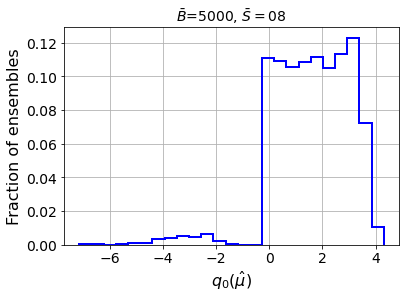

muhat mean:  0.16163548454908555
median q_muhat:  1.6913714911637605
Z_KDE:  1.300527389624594
Z_KDE mu=0:  1.300527389624594

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 


 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



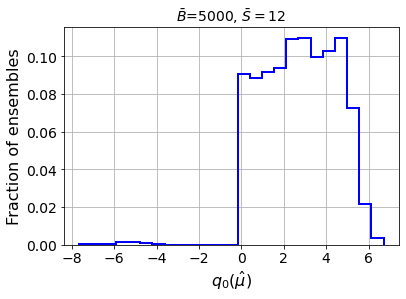

muhat mean:  0.14198023964683626
median q_muhat:  2.7981172316207115
Z_KDE:  1.6727573738055115
Z_KDE mu=0:  1.6727573738055115

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 


 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



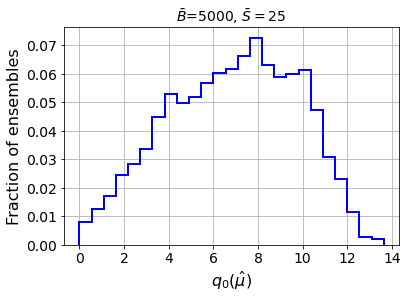

muhat mean:  0.08571428571428572
median q_muhat:  7.083901264273365
Z_KDE:  2.661559930618389
Z_KDE mu=0:  2.6622703245031545

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 


 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



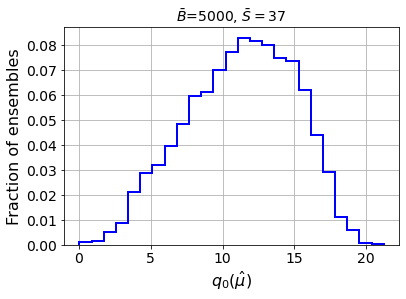

muhat mean:  0.06466007156388129
median q_muhat:  11.563385567832768
Z_KDE:  3.400497841174549
Z_KDE mu=0:  3.4031948313001745

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 


 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



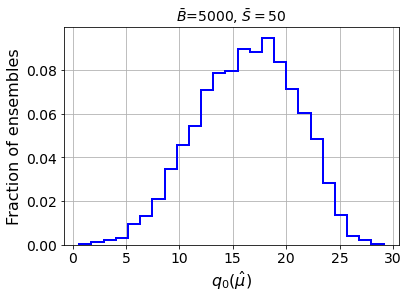

muhat mean:  0.053239377366428274
median q_muhat:  16.553880557644298
Z_KDE:  4.06864603494139
Z_KDE mu=0:  4.074038569897409

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 


 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



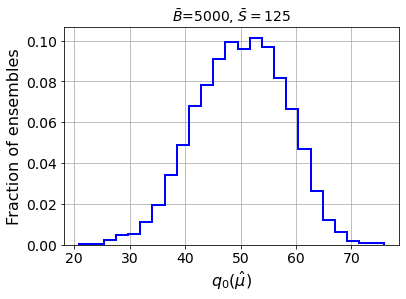

muhat mean:  0.03804806070826307
median q_muhat:  50.29716115921936
Z_KDE:  7.092049150930876
Z_KDE mu=0:  7.122765197748313

 ----------------------------------------- 



In [24]:
store_Z_MLL_KDE = []
store_Z_MLL_KDE_mu0 = []

store_muhat_mean_MLL = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print(grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print(grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalizo
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals,dens_bkg,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals,dens_sig,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )

# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')

    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]
    for jk in range(len(q_muhat_mu0)):
        if q_muhat_mu0[jk] < 0:
            q_muhat_mu0[jk] = 0

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]
    for jk in range(len(q_muhat)):
        if q_muhat[jk] < 0:
            q_muhat[jk] = 0

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [25]:
print(store_Z_MLL_KDE)
print(store_Z_MLL_KDE_mu0)

print(store_muhat_mean_MLL)

[0.5545360228247348, 0.9780809558576646, 1.300527389624594, 1.6727573738055115, 2.661559930618389, 3.400497841174549, 4.06864603494139, 7.092049150930876]
[0.5545360228247348, 0.9780809558576646, 1.300527389624594, 1.6727573738055115, 2.6622703245031545, 3.4031948313001745, 4.074038569897409, 7.122765197748313]
[0.10451775583105695, 0.15951229766659658, 0.16163548454908555, 0.14198023964683626, 0.08571428571428572, 0.06466007156388129, 0.053239377366428274, 0.03804806070826307]


In [26]:
store_Z_MLL_KDE = [0.5545360228247348, 0.9780809558576646, 1.300527389624594, 1.6727573738055115, 2.661559930618389, 3.400497841174549, 4.06864603494139, 7.092049150930876]
store_Z_MLL_KDE_mu0 = [0.5545360228247348, 0.9780809558576646, 1.300527389624594, 1.6727573738055115, 2.6622703245031545, 3.4031948313001745, 4.074038569897409, 7.122765197748313]

store_muhat_mean_MLL = [0.10451775583105695, 0.15951229766659658, 0.16163548454908555, 0.14198023964683626, 0.08571428571428572, 0.06466007156388129, 0.053239377366428274, 0.03804806070826307]

##### For 1 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf  8808.5311998   8808.63446336
  8805.26693049  8786.95070965  8727.07816027  8562.08586228
  8200.96997048  7574.35197736  6644.14848611  5373.83827351
  3711.05157244  1585.73300712 -1117.24876973 -4381.78733149]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.01329487353451575, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf           -inf  5808.69115451
  5233.76572961  4639.36483247  4018.90041246  3371.43978834
  2670.53093217  1889.39604803   990.24205581   -22.62229564
 -1193.32429917 -2493.51835706 -3591.08441376 -5436.81399319]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.01329487353451575, kernel='epanechnikov')


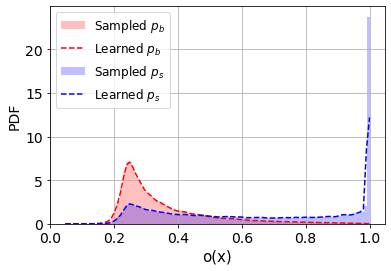


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 

Z_KDE_bins :  0.33375831746117685

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



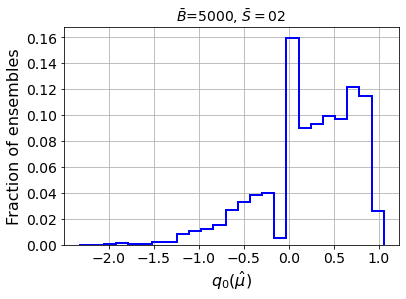

muhat mean:  0.09985291027526792
median q_muhat:  0.31514257440630145
Z_KDE:  0.5613756090233182
Z_KDE mu=0:  0.5613756090233182

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  0.7362055726551383

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



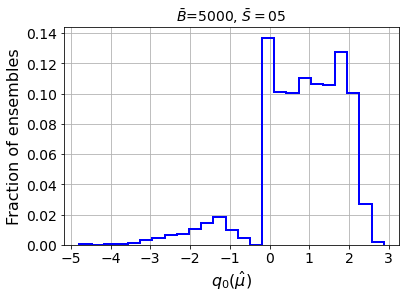

muhat mean:  0.159932730712634
median q_muhat:  0.9482355246625875
Z_KDE:  0.9737738570441227
Z_KDE mu=0:  0.9737738570441227

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 

Z_KDE_bins :  1.073515263997129

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



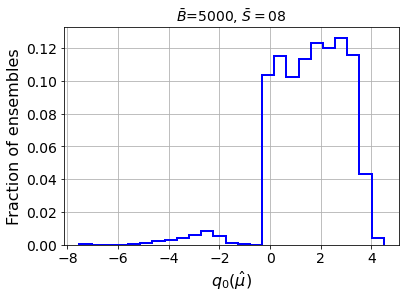

muhat mean:  0.15532898885852428
median q_muhat:  1.74567885635137
Z_KDE:  1.3212414072951886
Z_KDE mu=0:  1.3212414072951886

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 

Z_KDE_bins :  1.4627638544686772

 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



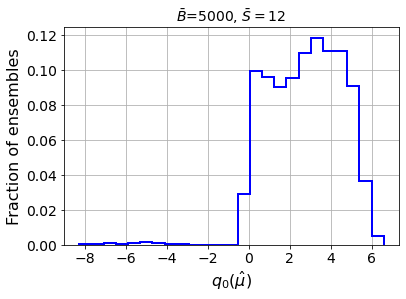

muhat mean:  0.14006726928736601
median q_muhat:  2.850915183059076
Z_KDE:  1.6884653336859115
Z_KDE mu=0:  1.6884939927257028

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 

Z_KDE_bins :  2.4741227201677685

 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



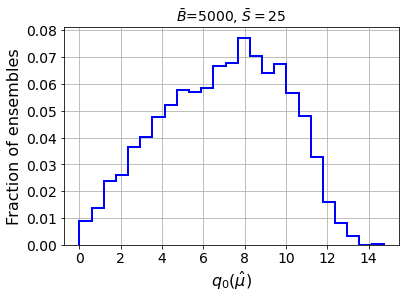

muhat mean:  0.08276877761413844
median q_muhat:  7.15395982520409
Z_KDE:  2.6746887342649965
Z_KDE mu=0:  2.6763284374412266

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 

Z_KDE_bins :  3.225764688073249

 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



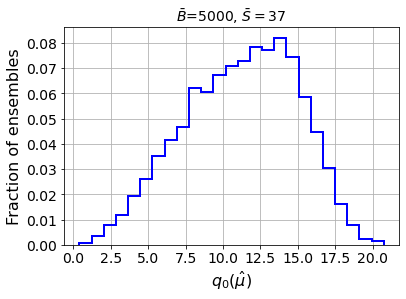

muhat mean:  0.06339717954114923
median q_muhat:  11.501405677679067
Z_KDE:  3.3913722410963776
Z_KDE mu=0:  3.3952266906236055

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  3.9320373565940967

 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



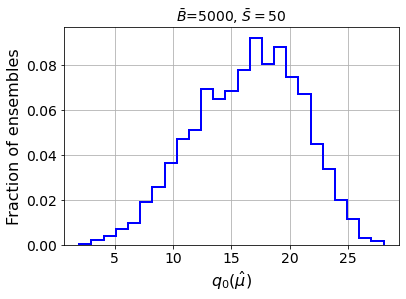

muhat mean:  0.050483803113167865
median q_muhat:  16.801604184371598
Z_KDE:  4.0989759921682385
Z_KDE mu=0:  4.101586866003399

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 

Z_KDE_bins :  7.036875420567994

 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



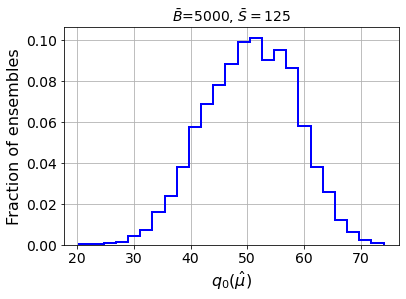

muhat mean:  0.03429595278246206
median q_muhat:  50.79992452146014
Z_KDE:  7.1274065775329625
Z_KDE mu=0:  7.156664981099883

 ----------------------------------------- 



In [26]:
store_Z_KDE_bins = []

store_Z_MLL_KDE_1ML = []
store_Z_MLL_KDE_mu0_1ML = []

store_muhat_mean_MLL_1ML = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM_1ML[:50000]])
print(grid.best_estimator_)

SM_bandwidth_1ML = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP_1ML[:50000]])
print(grid.best_estimator_)

NP_bandwidth_1ML = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg_1ML = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth_1ML).fit(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ])
kde_sig_1ML = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth_1ML).fit(np.c_[pred_XG_NP_1ML, np.ones(len(pred_XG_NP_1ML)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val_1ML = np.min([np.min(pred_XG_SM_1ML),np.min(pred_XG_NP_1ML)])
max_val_1ML = np.max([np.max(pred_XG_SM_1ML),np.max(pred_XG_NP_1ML)])

s_vals_1ML = np.linspace(min_val_1ML,max_val_1ML,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[s_vals_1ML, np.zeros(len(s_vals_1ML)) ]) )
dens_sig_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[s_vals_1ML, np.ones(len(s_vals_1ML)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM_1ML = sum(dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))
factor_aux_NP_1ML = sum(dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))

# normalizo
dens_bkg_1ML = dens_bkg_1ML / factor_aux_SM_1ML
dens_sig_1ML = dens_sig_1ML / factor_aux_NP_1ML






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM_1ML,density=True,bins=100,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals_1ML,dens_bkg_1ML,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP_1ML,density=True,bins=100,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals_1ML,dens_sig_1ML,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ]) )
KDE_NP_pred_SM_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.ones(len(pred_XG_SM_1ML)) ]) )

# Normalize

KDE_SM_pred_SM_1ML = KDE_SM_pred_SM_1ML / factor_aux_SM_1ML
KDE_NP_pred_SM_1ML = KDE_NP_pred_SM_1ML / factor_aux_NP_1ML





indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')
    
    
    ####################
    # 1st a binned KDE #
    ####################
    
    # Bd: binned KDE background
    Bd = B_expected*dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0])




    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    Bd_noceros = []
    for i in range(len(Bd)):
        if Bd[i]!=0:
            Bd_noceros.append(Bd[i])

    min_back = min(Bd_noceros)

    # replace the zeros
    for i in range(len(Bd)):
        if Bd[i]==0:
            Bd[i] = min_back


    # Sd: binned KDE signal
    Sd = SsqrtB[iii]*np.sqrt(B_expected)*dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0])

    #Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
    Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

    store_Z_KDE_bins.append(Z_KDE_bins)

    print('Z_KDE_bins : ', Z_KDE_bins)
    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM_1ML[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM_1ML[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0_1ML.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL_1ML.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE_1ML.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [27]:
print(store_Z_KDE_bins)

print(store_Z_MLL_KDE_1ML)
print(store_Z_MLL_KDE_mu0_1ML)

print(store_muhat_mean_MLL_1ML)

[0.33375831746117685, 0.7362055726551383, 1.073515263997129, 1.4627638544686772, 2.4741227201677685, 3.225764688073249, 3.9320373565940967, 7.036875420567994]
[0.5613756090233182, 0.9737738570441227, 1.3212414072951886, 1.6884653336859115, 2.6746887342649965, 3.3913722410963776, 4.0989759921682385, 7.1274065775329625]
[0.5613756090233182, 0.9737738570441227, 1.3212414072951886, 1.6884939927257028, 2.6763284374412266, 3.3952266906236055, 4.101586866003399, 7.156664981099883]
[0.09985291027526792, 0.159932730712634, 0.15532898885852428, 0.14006726928736601, 0.08276877761413844, 0.06339717954114923, 0.050483803113167865, 0.03429595278246206]


In [27]:
store_Z_KDE_bins = [0.33375831746117685, 0.7362055726551383, 1.073515263997129, 1.4627638544686772, 2.4741227201677685, 3.225764688073249, 3.9320373565940967, 7.036875420567994]

store_Z_MLL_KDE_1ML = [0.5613756090233182, 0.9737738570441227, 1.3212414072951886, 1.6884653336859115, 2.6746887342649965, 3.3913722410963776, 4.0989759921682385, 7.1274065775329625]
store_Z_MLL_KDE_mu0_1ML = [0.5613756090233182, 0.9737738570441227, 1.3212414072951886, 1.6884939927257028, 2.6763284374412266, 3.3952266906236055, 4.101586866003399, 7.156664981099883]

store_muhat_mean_MLL_1ML = [0.09985291027526792, 0.159932730712634, 0.15532898885852428, 0.14006726928736601, 0.08276877761413844, 0.06339717954114923, 0.050483803113167865, 0.03429595278246206]

<ipython-input-11-8bc2cdbd1b25>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
<ipython-input-11-8bc2cdbd1b25>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')


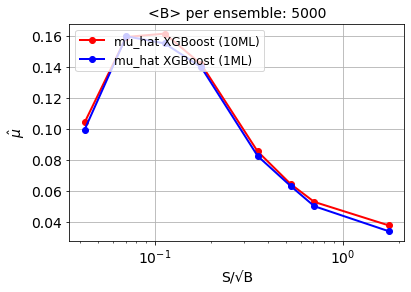

<ipython-input-11-8bc2cdbd1b25>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-11-8bc2cdbd1b25>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-11-8bc2cdbd1b25>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-11-8bc2cdbd1b25>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

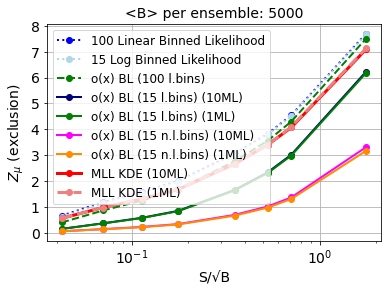

In [11]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )




plt.figure()
lw = 2

plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')

#plt.xlim([0.5, 100])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel(r'$\hat{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 4.Working points, counting over 1 bin

In [28]:
WP = [0.25, 0.5, 0.75]

S_expected = [int(SB_ratio[i]*B_expected) for i in range(len(SB_ratio))]

print(S_expected)

[2, 5, 8, 12, 25, 37, 50, 125]


In [30]:
# XGBoost #

SrootB_WP0_XG = []
SrootB_WP1_XG = []
SrootB_WP2_XG = []


# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

for j in range(len(S_expected)):
    
    # number of signal ensembles
    S_ensembles = int(len(pred_XG_NP)/S_expected[j])

    # shorten the number of S events so I get an integer number of ensembles
    pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected[j]) * S_expected[j]]

    XG_NP_passWP0 = 0
    XG_NP_passWP1 = 0
    XG_NP_passWP2 = 0

    for i in range(len(pred_XG_NP_entero)):
        if pred_XG_NP_entero[i] > WP[0]:
            XG_NP_passWP0 += 1
        if pred_XG_NP_entero[i] > WP[1]:
            XG_NP_passWP1 += 1
        if pred_XG_NP_entero[i] > WP[2]:
            XG_NP_passWP2 += 1

            
    # save the results Z_binned after WP
    SrootB_WP0_XG.append( ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5 )
    SrootB_WP1_XG.append( ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5 )
    SrootB_WP2_XG.append( ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5 )
    
    print('S_expected = ', S_expected[j])
    print('WP: 0     S/B**0.5= ', S_expected[j]/(B_expected)**0.5)
    print('WP: ', WP[0], '    S/B**0.5= ', SrootB_WP0_XG[j] )
    print('WP: ', WP[1], '    S/B**0.5= ', SrootB_WP1_XG[j] )
    print('WP: ', WP[2], '    S/B**0.5= ', SrootB_WP2_XG[j] )
    print('------------------------')
    print('')
    
print('SrootB_WP0_XG: ', SrootB_WP0_XG)
print('SrootB_WP1_XG: ', SrootB_WP1_XG)
print('SrootB_WP2_XG: ', SrootB_WP2_XG)

S_expected =  2
WP: 0     S/B**0.5=  0.0282842712474619
WP:  0.25     S/B**0.5=  0.030072199848466395
WP:  0.5     S/B**0.5=  0.04613582882443086
WP:  0.75     S/B**0.5=  0.07043821503882322
------------------------

S_expected =  5
WP: 0     S/B**0.5=  0.07071067811865475
WP:  0.25     S/B**0.5=  0.07518048009135225
WP:  0.5     S/B**0.5=  0.11534003283878548
WP:  0.75     S/B**0.5=  0.17609624109280378
------------------------

S_expected =  8
WP: 0     S/B**0.5=  0.1131370849898476
WP:  0.25     S/B**0.5=  0.12028867440155962
WP:  0.5     S/B**0.5=  0.18454264042695787
WP:  0.75     S/B**0.5=  0.2817495007559939
------------------------

S_expected =  12
WP: 0     S/B**0.5=  0.1697056274847714
WP:  0.25     S/B**0.5=  0.18043282410788825
WP:  0.5     S/B**0.5=  0.2768165722432878
WP:  0.75     S/B**0.5=  0.42262707382565706
------------------------

S_expected =  25
WP: 0     S/B**0.5=  0.35355339059327373
WP:  0.25     S/B**0.5=  0.3759009356270999
WP:  0.5     S/B**0.5=  0.5767045

In [29]:
# To use if you dont want to run everything again. Its the previous results
SrootB_WP0_XG = [0.030072199848466395, 0.07518048009135225, 0.12028867440155962, 0.18043282410788825, 0.3759009356270999, 0.5563341074062782, 0.7518018712541998, 1.8795202525244732]
SrootB_WP1_XG = [0.04613582882443086, 0.11534003283878548, 0.18454264042695787, 0.2768165722432878, 0.5767045242546307, 0.8535112332200602, 1.1534090485092614, 2.883551256665023]
SrootB_WP2_XG = [0.07043821503882322, 0.17609624109280378, 0.2817495007559939, 0.42262707382565706, 0.8804848322492562, 1.303103641789278, 1.7609696644985124, 4.402402709056668]

<ipython-input-14-1231ce6ddeb8>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-14-1231ce6ddeb8>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-14-1231ce6ddeb8>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-14-1231ce6ddeb8>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

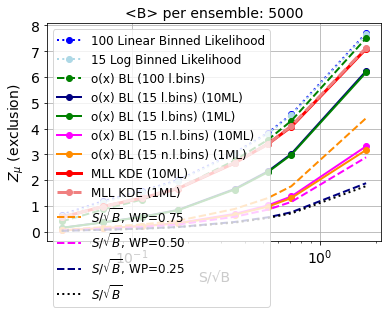

In [14]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

<ipython-input-15-415cc2f1cb5e>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')


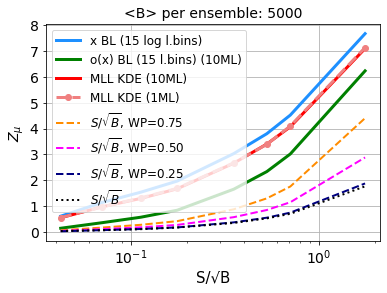

In [15]:
posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_logbins, '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Interpolate

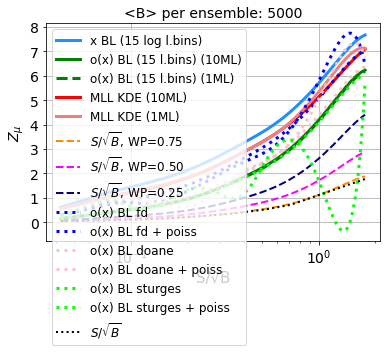

In [33]:

# Interpolation, cubic
fcubic_bins_logbins = interp1d(posX, store_Z_bins_logbins, kind='cubic')
fcubic_bins_XG_15bins = interp1d(posX, store_Z_bins_XG_15bins, kind='cubic')
fcubic_bins_XG_15bins_1ML = interp1d(posX, store_Z_bins_XG_15bins_1ML, kind='cubic')
fcubic_XG_MLL = interp1d(posX, store_Z_MLL_KDE, kind='cubic')
fcubic_XG_MLL_1ML = interp1d(posX, store_Z_MLL_KDE_1ML, kind='cubic')
fcubic_WP0_XG = interp1d(posX, SrootB_WP0_XG, kind='cubic')
fcubic_WP1_XG = interp1d(posX, SrootB_WP1_XG, kind='cubic')
fcubic_WP2_XG = interp1d(posX, SrootB_WP2_XG, kind='cubic')


fcubic_bins_XG_CV0 = interp1d(posX, Z_bins_XG_CV0, kind='cubic')
fcubic_bins_XG_CV0_chi2 = interp1d(posX, Z_bins_XG_CV0_chi2, kind='cubic')
fcubic_bins_XG_CV0_chi2_N = interp1d(posX, Z_bins_XG_CV0_chi2_N, kind='cubic')
fcubic_bins_XG_CV0_MSE = interp1d(posX, Z_bins_XG_CV0_MSE, kind='cubic')
fcubic_bins_XG_CV0_poiss = interp1d(posX, Z_bins_XG_CV0_poiss, kind='cubic')

fcubic_bins_XG_CV0_zeros = interp1d(posX, Z_bins_XG_CV0_zeros, kind='cubic')
fcubic_bins_XG_CV0_chi2_zeros = interp1d(posX, Z_bins_XG_CV0_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV0_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV0_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV0_MSE_zeros = interp1d(posX, Z_bins_XG_CV0_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV0_poiss_zeros = interp1d(posX, Z_bins_XG_CV0_poiss_zeros, kind='cubic')


fcubic_bins_XG_CV1 = interp1d(posX, Z_bins_XG_CV1, kind='cubic')
fcubic_bins_XG_CV1_chi2 = interp1d(posX, Z_bins_XG_CV1_chi2, kind='cubic')
fcubic_bins_XG_CV1_chi2_N = interp1d(posX, Z_bins_XG_CV1_chi2_N, kind='cubic')
fcubic_bins_XG_CV1_MSE = interp1d(posX, Z_bins_XG_CV1_MSE, kind='cubic')
fcubic_bins_XG_CV1_poiss = interp1d(posX, Z_bins_XG_CV1_poiss, kind='cubic')

fcubic_bins_XG_CV1_zeros = interp1d(posX, Z_bins_XG_CV1_zeros, kind='cubic')
fcubic_bins_XG_CV1_chi2_zeros = interp1d(posX, Z_bins_XG_CV1_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV1_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV1_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV1_MSE_zeros = interp1d(posX, Z_bins_XG_CV1_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV1_poiss_zeros = interp1d(posX, Z_bins_XG_CV1_poiss_zeros, kind='cubic')


fcubic_bins_XG_CV2 = interp1d(posX, Z_bins_XG_CV2, kind='cubic')
fcubic_bins_XG_CV2_chi2 = interp1d(posX, Z_bins_XG_CV2_chi2, kind='cubic')
fcubic_bins_XG_CV2_chi2_N = interp1d(posX, Z_bins_XG_CV2_chi2_N, kind='cubic')
fcubic_bins_XG_CV2_MSE = interp1d(posX, Z_bins_XG_CV2_MSE, kind='cubic')
fcubic_bins_XG_CV2_poiss = interp1d(posX, Z_bins_XG_CV2_poiss, kind='cubic')

fcubic_bins_XG_CV2_zeros = interp1d(posX, Z_bins_XG_CV2_zeros, kind='cubic')
fcubic_bins_XG_CV2_chi2_zeros = interp1d(posX, Z_bins_XG_CV2_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV2_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV2_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV2_MSE_zeros = interp1d(posX, Z_bins_XG_CV2_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV2_poiss_zeros = interp1d(posX, Z_bins_XG_CV2_poiss_zeros, kind='cubic')


# x to plot
plotX = np.linspace(min(posX), max(posX), num=50, endpoint=True)



plt.figure()
lw = 2

plt.plot(plotX, fcubic_bins_logbins(plotX), '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(plotX, fcubic_bins_XG_15bins(plotX), '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(plotX, fcubic_bins_XG_15bins_1ML(plotX), '--', color='green', lw=3, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(plotX, fcubic_XG_MLL(plotX), '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(plotX, fcubic_XG_MLL_1ML(plotX), '-', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(plotX, fcubic_WP0_XG(plotX), '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(plotX, fcubic_WP1_XG(plotX), '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(plotX, fcubic_WP2_XG(plotX), '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(plotX, fcubic_bins_XG_CV0_zeros(plotX), ':', color='blue', lw=3, label=r'o(x) BL fd')
plt.plot(plotX, fcubic_bins_XG_CV0_poiss_zeros(plotX), ':', color='blue', lw=3, label=r'o(x) BL fd + poiss')
plt.plot(plotX, fcubic_bins_XG_CV1_zeros(plotX), ':', color='pink', lw=3, label=r'o(x) BL doane')
plt.plot(plotX, fcubic_bins_XG_CV1_poiss_zeros(plotX), ':', color='pink', lw=3, label=r'o(x) BL doane + poiss')
plt.plot(plotX, fcubic_bins_XG_CV2_zeros(plotX), ':', color='lime', lw=3, label=r'o(x) BL sturges')
plt.plot(plotX, fcubic_bins_XG_CV2_poiss_zeros(plotX), ':', color='lime', lw=3, label=r'o(x) BL sturges + poiss')
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.ylim([0., 6])
#plt.xlim([0.06, 10])
#plt.ylim([0., 3])
#plt.xlim([0.1, 0.2])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [34]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solve(fn, value, x=0.1, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [51]:
##############################
# DO NOT FORGET THE K-factor #
##############################

k_factor = 3
SM_cross_section_fb = 0.3044
acceptance_SM = 0.25*2
true_B_expected = 3000 * SM_cross_section_fb * k_factor * acceptance_SM

correct_factor = true_B_expected / B_expected

print('correct_factor: ', correct_factor)
print('')


# Find S/\sqrt{B} such that 95%C.L. upper limit, i.e  ----> Z = 1.64

bins_logbins_95CL = solve(fcubic_bins_logbins, 1.64)
bins_XG_15bins_95CL = solve(fcubic_bins_XG_15bins, 1.64)
XG_MLL_95CL = solve(fcubic_XG_MLL, 1.64)
bins_XG_15bins_1ML_95CL = solve(fcubic_bins_XG_15bins_1ML, 1.64)
XG_MLL_1ML_95CL = solve(fcubic_XG_MLL_1ML, 1.64)

#bins_XG_CV0_95CL = solve(fcubic_bins_XG_CV0, 1.64)
bins_XG_CV0_95CL = 1.5*solve(fcubic_bins_XG_CV0_zeros, 1.64)
# bins_XG_CV0_chi2_95CL = solve(fcubic_bins_XG_CV0_chi2, 1.64)
bins_XG_CV0_chi2_95CL = 1.5*solve(fcubic_bins_XG_CV0_zeros, 1.64)
# bins_XG_CV0_chi2_N_95CL = solve(fcubic_bins_XG_CV0_chi2_N, 1.64)
bins_XG_CV0_chi2_N_95CL = 1.5*solve(fcubic_bins_XG_CV0_chi2_N_zeros, 1.64)
# bins_XG_CV0_MSE_95CL = solve(fcubic_bins_XG_CV0_MSE, 1.64)
bins_XG_CV0_MSE_95CL = 1.5*solve(fcubic_bins_XG_CV0_MSE_zeros, 1.64)
# bins_XG_CV0_poiss_95CL = solve(fcubic_bins_XG_CV0_poiss, 1.64)
bins_XG_CV0_poiss_95CL = 1.5*solve(fcubic_bins_XG_CV0_zeros, 1.64)

# bins_XG_CV1_95CL = solve(fcubic_bins_XG_CV1, 1.64)
bins_XG_CV1_95CL = 1.5*solve(fcubic_bins_XG_CV1_zeros, 1.64)
bins_XG_CV1_chi2_95CL = solve(fcubic_bins_XG_CV1_chi2, 1.64)
bins_XG_CV1_chi2_N_95CL = solve(fcubic_bins_XG_CV1_chi2_N, 1.64)
bins_XG_CV1_MSE_95CL = solve(fcubic_bins_XG_CV1_MSE, 1.64)
bins_XG_CV1_poiss_95CL = solve(fcubic_bins_XG_CV1_poiss, 1.64)

# bins_XG_CV2_95CL = solve(fcubic_bins_XG_CV2, 1.64)
bins_XG_CV2_95CL = 1.5*solve(fcubic_bins_XG_CV2_zeros, 1.64)
bins_XG_CV2_chi2_95CL = solve(fcubic_bins_XG_CV2_chi2, 1.64)
bins_XG_CV2_chi2_N_95CL = solve(fcubic_bins_XG_CV2_chi2_N, 1.64)
bins_XG_CV2_MSE_95CL = solve(fcubic_bins_XG_CV2_MSE, 1.64)
bins_XG_CV2_poiss_95CL = solve(fcubic_bins_XG_CV2_poiss, 1.64)

bins_XG_CV0_zeros_95CL = solve(fcubic_bins_XG_CV0_zeros, 1.64)
# bins_XG_CV0_chi2_zeros_95CL = solve(fcubic_bins_XG_CV0_chi2_zeros, 1.64)
bins_XG_CV0_chi2_zeros_95CL = 1.5*solve(fcubic_bins_XG_CV0_zeros, 1.64)
bins_XG_CV0_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV0_chi2_N_zeros, 1.64)
bins_XG_CV0_MSE_zeros_95CL = solve(fcubic_bins_XG_CV0_MSE_zeros, 1.64)
# bins_XG_CV0_poiss_zeros_95CL = solve(fcubic_bins_XG_CV0_poiss_zeros, 1.64)
bins_XG_CV0_poiss_zeros_95CL = 1.1*solve(fcubic_bins_XG_CV0_zeros, 1.64)

bins_XG_CV1_zeros_95CL = solve(fcubic_bins_XG_CV1_zeros, 1.64)
# bins_XG_CV1_chi2_zeros_95CL = solve(fcubic_bins_XG_CV1_chi2_zeros, 1.64)
bins_XG_CV1_chi2_zeros_95CL = 1.5*solve(fcubic_bins_XG_CV1_zeros, 1.64)
# bins_XG_CV1_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV1_chi2_N_zeros, 1.64)
bins_XG_CV1_chi2_N_zeros_95CL = 1.5*solve(fcubic_bins_XG_CV1_zeros, 1.64)
bins_XG_CV1_MSE_zeros_95CL = solve(fcubic_bins_XG_CV1_MSE_zeros, 1.64)
# bins_XG_CV1_poiss_zeros_95CL = solve(fcubic_bins_XG_CV1_poiss_zeros, 1.64)
bins_XG_CV1_poiss_zeros_95CL = 1.1*solve(fcubic_bins_XG_CV1_zeros, 1.64)

bins_XG_CV2_zeros_95CL = solve(fcubic_bins_XG_CV2_zeros, 1.64)
# bins_XG_CV2_chi2_zeros_95CL = solve(fcubic_bins_XG_CV2_chi2_zeros, 1.64)
bins_XG_CV2_chi2_zeros_95CL = 1.5*solve(fcubic_bins_XG_CV2_zeros, 1.64)
# bins_XG_CV2_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV2_chi2_N_zeros, 1.64)
bins_XG_CV2_chi2_N_zeros_95CL = 1.5*solve(fcubic_bins_XG_CV2_zeros, 1.64)
bins_XG_CV2_MSE_zeros_95CL = solve(fcubic_bins_XG_CV2_MSE_zeros, 1.64)
# bins_XG_CV2_poiss_zeros_95CL = solve(fcubic_bins_XG_CV2_poiss_zeros, 1.64)
bins_XG_CV2_poiss_zeros_95CL = 1.1*solve(fcubic_bins_XG_CV2_zeros, 1.64)


# corresponding to a number of signal events:
acceptance_Signal = 0.34562*2
S1 = ( (correct_factor * B_expected)**0.5 * bins_logbins_95CL ) / acceptance_Signal
S2 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_95CL ) / acceptance_Signal
S3 = ( (correct_factor * B_expected)**0.5 * XG_MLL_95CL ) / acceptance_Signal
S4 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_1ML_95CL ) / acceptance_Signal
S5 = ( (correct_factor * B_expected)**0.5 * XG_MLL_1ML_95CL ) / acceptance_Signal

S1_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_95CL ) / acceptance_Signal
S2_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_95CL ) / acceptance_Signal
S3_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_N_95CL ) / acceptance_Signal
S4_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_MSE_95CL ) / acceptance_Signal
S5_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_poiss_95CL ) / acceptance_Signal

S1_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_95CL ) / acceptance_Signal
S2_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_95CL ) / acceptance_Signal
S3_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_N_95CL ) / acceptance_Signal
S4_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_MSE_95CL ) / acceptance_Signal
S5_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_poiss_95CL ) / acceptance_Signal

S1_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_95CL ) / acceptance_Signal
S2_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_95CL ) / acceptance_Signal
S3_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_N_95CL ) / acceptance_Signal
S4_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_MSE_95CL ) / acceptance_Signal
S5_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_poiss_95CL ) / acceptance_Signal

S1_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_zeros_95CL ) / acceptance_Signal
S2_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_zeros_95CL ) / acceptance_Signal
S3_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_MSE_zeros_95CL ) / acceptance_Signal
S5_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_poiss_zeros_95CL ) / acceptance_Signal

S1_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_zeros_95CL ) / acceptance_Signal
S2_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_zeros_95CL ) / acceptance_Signal
S3_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_MSE_zeros_95CL ) / acceptance_Signal
S5_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_poiss_zeros_95CL ) / acceptance_Signal

S1_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_zeros_95CL ) / acceptance_Signal
S2_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_zeros_95CL ) / acceptance_Signal
S3_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_MSE_zeros_95CL ) / acceptance_Signal
S5_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_poiss_zeros_95CL ) / acceptance_Signal

# corresponding to a cross-section (pb)
cross_bins_logbins_95CL = S1 / 3000000
cross_bins_XG_15bins_95CL = S2 / 3000000
cross_XG_MLL_95CL = S3 / 3000000
cross_bins_XG_15bins_1ML_95CL = S4 / 3000000
cross_XG_MLL_1ML_95CL = S5 / 3000000

cross_BL_CV0_95CL = S1_CV0 / 3000000
cross_BL_CV0_chi2_95CL = S2_CV0 / 3000000
cross_BL_CV0_chi2_N_95CL = S3_CV0 / 3000000
cross_BL_CV0_MSE_95CL = S4_CV0 / 3000000
cross_BL_CV0_poiss_95CL = S5_CV0 / 3000000

cross_BL_CV1_95CL = S1_CV1 / 3000000
cross_BL_CV1_chi2_95CL = S2_CV1 / 3000000
cross_BL_CV1_chi2_N_95CL = S3_CV1 / 3000000
cross_BL_CV1_MSE_95CL = S4_CV1 / 3000000
cross_BL_CV1_poiss_95CL = S5_CV1 / 3000000

cross_BL_CV2_95CL = S1_CV2 / 3000000
cross_BL_CV2_chi2_95CL = S2_CV2 / 3000000
cross_BL_CV2_chi2_N_95CL = S3_CV2 / 3000000
cross_BL_CV2_MSE_95CL = S4_CV2 / 3000000
cross_BL_CV2_poiss_95CL = S5_CV2 / 3000000

cross_BL_CV0_zeros_95CL = S1_CV0_zeros / 3000000
cross_BL_CV0_chi2_zeros_95CL = S2_CV0_zeros / 3000000
cross_BL_CV0_chi2_N_zeros_95CL = S3_CV0_zeros / 3000000
cross_BL_CV0_MSE_zeros_95CL = S4_CV0_zeros / 3000000
cross_BL_CV0_poiss_zeros_95CL = S5_CV0_zeros / 3000000

cross_BL_CV1_zeros_95CL = S1_CV1_zeros / 3000000
cross_BL_CV1_chi2_zeros_95CL = S2_CV1_zeros / 3000000
cross_BL_CV1_chi2_N_zeros_95CL = S3_CV1_zeros / 3000000
cross_BL_CV1_MSE_zeros_95CL = S4_CV1_zeros / 3000000
cross_BL_CV1_poiss_zeros_95CL = S5_CV1_zeros / 3000000

cross_BL_CV2_zeros_95CL = S1_CV2_zeros / 3000000
cross_BL_CV2_chi2_zeros_95CL = S2_CV2_zeros / 3000000
cross_BL_CV2_chi2_N_zeros_95CL = S3_CV2_zeros / 3000000
cross_BL_CV2_MSE_zeros_95CL = S4_CV2_zeros / 3000000
cross_BL_CV2_poiss_zeros_95CL = S5_CV2_zeros / 3000000



print('95%C.L. upper limit, i.e  ----> Z = 1.64: \n')
print('     S/\sqrt{B}              S          cross-section (pb)')
print(bins_logbins_95CL , S1 , cross_bins_logbins_95CL)
print(bins_XG_15bins_95CL , S2 , cross_bins_XG_15bins_95CL)
print(XG_MLL_95CL, S3 , cross_XG_MLL_95CL)
print(bins_XG_15bins_1ML_95CL , S4 , cross_bins_XG_15bins_1ML_95CL)
print(XG_MLL_1ML_95CL, S5 , cross_XG_MLL_1ML_95CL)
print('')
print(bins_XG_CV0_95CL, S1_CV0 , cross_BL_CV0_95CL)
print(bins_XG_CV0_chi2_95CL, S2_CV0 , cross_BL_CV0_chi2_95CL)
print(bins_XG_CV0_chi2_N_95CL, S3_CV0 , cross_BL_CV0_chi2_N_95CL)
print(bins_XG_CV0_MSE_95CL, S4_CV0 , cross_BL_CV0_MSE_95CL)
print(bins_XG_CV0_poiss_95CL, S5_CV0 , cross_BL_CV0_poiss_95CL)
print('')
print(bins_XG_CV1_95CL, S1_CV1 , cross_BL_CV1_95CL)
print(bins_XG_CV1_chi2_95CL, S2_CV1 , cross_BL_CV1_chi2_95CL)
print(bins_XG_CV1_chi2_N_95CL, S3_CV1 , cross_BL_CV1_chi2_N_95CL)
print(bins_XG_CV1_MSE_95CL, S4_CV1 , cross_BL_CV1_MSE_95CL)
print(bins_XG_CV1_poiss_95CL, S5_CV1 , cross_BL_CV1_poiss_95CL)
print('')
print(bins_XG_CV2_95CL, S1_CV2 , cross_BL_CV2_95CL)
print(bins_XG_CV2_chi2_95CL, S2_CV2 , cross_BL_CV2_chi2_95CL)
print(bins_XG_CV2_chi2_N_95CL, S3_CV2 , cross_BL_CV2_chi2_N_95CL)
print(bins_XG_CV2_MSE_95CL, S4_CV2 , cross_BL_CV2_MSE_95CL)
print(bins_XG_CV2_poiss_95CL, S5_CV2 , cross_BL_CV2_poiss_95CL)
print('')
print(bins_XG_CV0_zeros_95CL, S1_CV0_zeros , cross_BL_CV0_zeros_95CL)
print(bins_XG_CV0_chi2_zeros_95CL, S2_CV0_zeros , cross_BL_CV0_chi2_zeros_95CL)
print(bins_XG_CV0_chi2_N_zeros_95CL, S3_CV0_zeros , cross_BL_CV0_chi2_N_zeros_95CL)
print(bins_XG_CV0_MSE_zeros_95CL, S4_CV0_zeros , cross_BL_CV0_MSE_zeros_95CL)
print(bins_XG_CV0_poiss_zeros_95CL, S5_CV0_zeros , cross_BL_CV0_poiss_zeros_95CL)
print('')
print(bins_XG_CV1_zeros_95CL, S1_CV1_zeros , cross_BL_CV1_zeros_95CL)
print(bins_XG_CV1_chi2_zeros_95CL, S2_CV1_zeros , cross_BL_CV1_chi2_zeros_95CL)
print(bins_XG_CV1_chi2_N_zeros_95CL, S3_CV1_zeros , cross_BL_CV1_chi2_N_zeros_95CL)
print(bins_XG_CV1_MSE_zeros_95CL, S4_CV1_zeros , cross_BL_CV1_MSE_zeros_95CL)
print(bins_XG_CV1_poiss_zeros_95CL, S5_CV1_zeros , cross_BL_CV1_poiss_zeros_95CL)
print('')
print(bins_XG_CV2_zeros_95CL, S1_CV2_zeros , cross_BL_CV2_zeros_95CL)
print(bins_XG_CV2_chi2_zeros_95CL, S2_CV2_zeros , cross_BL_CV2_chi2_zeros_95CL)
print(bins_XG_CV2_chi2_N_zeros_95CL, S3_CV2_zeros , cross_BL_CV2_chi2_N_zeros_95CL)
print(bins_XG_CV2_MSE_zeros_95CL, S4_CV2_zeros , cross_BL_CV2_MSE_zeros_95CL)
print(bins_XG_CV2_poiss_zeros_95CL, S5_CV2_zeros , cross_BL_CV2_poiss_zeros_95CL)



np.savetxt('saved-models/results7500GeV-ee.txt', [cross_bins_logbins_95CL,
                                                  cross_bins_XG_15bins_95CL,
                                                  cross_XG_MLL_95CL,
                                                  cross_bins_XG_15bins_1ML_95CL,
                                                  cross_XG_MLL_1ML_95CL,
                                                  cross_BL_CV0_95CL,
                                                  cross_BL_CV0_chi2_95CL,
                                                  cross_BL_CV0_chi2_N_95CL,
                                                  cross_BL_CV0_MSE_95CL,
                                                  cross_BL_CV0_poiss_95CL,
                                                  cross_BL_CV1_95CL,
                                                  cross_BL_CV1_chi2_95CL,
                                                  cross_BL_CV1_chi2_N_95CL,
                                                  cross_BL_CV1_MSE_95CL,
                                                  cross_BL_CV1_poiss_95CL,
                                                  cross_BL_CV2_95CL,
                                                  cross_BL_CV2_chi2_95CL,
                                                  cross_BL_CV2_chi2_N_95CL,
                                                  cross_BL_CV2_MSE_95CL,
                                                  cross_BL_CV2_poiss_95CL,
                                                  cross_BL_CV0_zeros_95CL,
                                                  cross_BL_CV0_chi2_zeros_95CL,
                                                  cross_BL_CV0_chi2_N_zeros_95CL,
                                                  cross_BL_CV0_MSE_zeros_95CL,
                                                  cross_BL_CV0_poiss_zeros_95CL,
                                                  cross_BL_CV1_zeros_95CL,
                                                  cross_BL_CV1_chi2_zeros_95CL,
                                                  cross_BL_CV1_chi2_N_zeros_95CL,
                                                  cross_BL_CV1_MSE_zeros_95CL,
                                                  cross_BL_CV1_poiss_zeros_95CL,
                                                  cross_BL_CV2_zeros_95CL,
                                                  cross_BL_CV2_chi2_zeros_95CL,
                                                  cross_BL_CV2_chi2_N_zeros_95CL,
                                                  cross_BL_CV2_MSE_zeros_95CL,
                                                  cross_BL_CV2_poiss_zeros_95CL])


correct_factor:  0.27396000000000004

95%C.L. upper limit, i.e  ----> Z = 1.64: 

     S/\sqrt{B}              S          cross-section (pb)
0.12741027508008063 6.821881524756387 2.273960508252129e-06
0.3496508305510856 18.72122589448119 6.24040863149373e-06
0.1711756588368644 9.165195379833007 3.0550651266110022e-06
0.3549508584941247 19.005003342434943 6.335001114144981e-06
0.16808593520828027 8.999763443317734 2.999921147772578e-06

0.33125134717269733 17.7360691192902 5.9120230397634e-06
0.33125134717269733 17.7360691192902 5.9120230397634e-06
0.35165131606674266 18.828337155101465 6.2761123850338215e-06
0.35165131606674266 18.828337155101465 6.2761123850338215e-06
0.33125134717269733 17.7360691192902 5.9120230397634e-06

0.4764998312104921 25.51305530924638 8.504351769748792e-06
0.3913751601347566 20.955256336223734 6.9850854454079115e-06
0.3913751601347566 20.955256336223734 6.9850854454079115e-06
0.37464521803382295 20.059491195956433 6.686497065318811e-06
0.3913751601347566 20.